In [1]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def ginindex(dfdeath,dfpop):
    cumcounter1 = 0
    cumcounter2 = 0
    indexcount = 0
    dfpop["County"] = dfpop["County"] + ", CA"
    dfmerge = pd.merge(dfdeath,dfpop)
    dfmerge['Deaths'] = dfmerge['Deaths'].astype(float)
    if dfmerge["Population"].dtype != float:
        dfmerge['Population'] = dfmerge['Population'].str.replace(',', '')
    dfmerge['Population'] = dfmerge['Population'].astype(float)
    dfmerge["Proportion"] = dfmerge["Deaths"]/dfmerge["Population"]
    dfmerge = dfmerge.sort_values("Proportion")
    dfmerge["cumulative pop"] = 0
    dfmerge["cumulative death"] = 0
    for index, row in dfmerge.iterrows():
        cumcounter1 += row['Population']
        dfmerge.at[index, 'cumulative pop'] = cumcounter1
    for index, row in dfmerge.iterrows():
        cumcounter2 += row['Deaths']
        dfmerge.at[index, 'cumulative death'] = cumcounter2
    lastdeath = dfmerge['cumulative death'].iloc[-1]
    lastpop = dfmerge['cumulative pop'].iloc[-1]
    dfmerge["proportiondeath"] = dfmerge["cumulative death"]/lastdeath
    dfmerge['proportionpopulation'] = dfmerge['cumulative pop']/lastpop
    new_row = {'County': 0, 'County Code': 0, 'Deaths': 0, 'Population':0 , 'Proportion':0 , 'cumulative pop': 0, 'cumulative death': 0, 'proportiondeath': 0, 'proportionpopulation': 0}
    new_row_df = pd.DataFrame([new_row])
    dfmerge = pd.concat([new_row_df, dfmerge], ignore_index=True)
    for index,row in dfmerge.iterrows():
        if index > 0:
            previous_population = dfmerge.at[index-1, "proportionpopulation"]
            previous_death = dfmerge.at[index-1, "proportiondeath"]
            num1 = row["proportionpopulation"] - previous_population
            num2 = row["proportiondeath"] + previous_death
            dfmerge.at[index, 'gini'] = 0.5 * num1 * num2
    dfmerge = dfmerge.drop(0)
    for index, row in dfmerge.iterrows():
        indexcount += row['gini']
    giniindex = (0.5 - indexcount)/0.5
    return giniindex


    return dfmerge

In [3]:
def ginindexgraph(dfdeath,dfpop):
    cumcounter1 = 0
    cumcounter2 = 0
    indexcount = 0
    dfpop["County"] = dfpop["County"] + ", CA"
    dfmerge = pd.merge(dfdeath,dfpop)
    dfmerge['Deaths'] = dfmerge['Deaths'].astype(float)
    if dfmerge["Population"].dtype != float:
        dfmerge['Population'] = dfmerge['Population'].str.replace(',', '')
    dfmerge['Population'] = dfmerge['Population'].astype(float)
    dfmerge["Proportion"] = dfmerge["Deaths"]/dfmerge["Population"]
    dfmerge = dfmerge.sort_values("Proportion")
    dfmerge["cumulative pop"] = 0
    dfmerge["cumulative death"] = 0
    for index, row in dfmerge.iterrows():
        cumcounter1 += row['Population']
        dfmerge.at[index, 'cumulative pop'] = cumcounter1
    for index, row in dfmerge.iterrows():
        cumcounter2 += row['Deaths']
        dfmerge.at[index, 'cumulative death'] = cumcounter2
    lastdeath = dfmerge['cumulative death'].iloc[-1]
    lastpop = dfmerge['cumulative pop'].iloc[-1]
    dfmerge["proportiondeath"] = dfmerge["cumulative death"]/lastdeath
    dfmerge['proportionpopulation'] = dfmerge['cumulative pop']/lastpop
    new_row = {'County': 0, 'County Code': 0, 'Deaths': 0, 'Population':0 , 'Proportion':0 , 'cumulative pop': 0, 'cumulative death': 0, 'proportiondeath': 0, 'proportionpopulation': 0}
    new_row_df = pd.DataFrame([new_row])
    dfmerge = pd.concat([new_row_df, dfmerge], ignore_index=True)
    x = dfmerge["proportionpopulation"]
    y = dfmerge['proportiondeath']
    x2 = dfmerge['proportionpopulation']
    y2 = dfmerge['proportionpopulation']
    graph = plt.plot(x,y)
    graph2 = plt.plot(x2,y2)
    return graph,graph2


In [4]:
def ginindex2(df):
    cumcounter1 = 0
    cumcounter2 = 0
    indexcount = 0
    df = df.drop('Crude Rate', axis = 1)
    df["Proportion"] = df["Deaths"]/df["Population"]
    df = df.sort_values("Proportion")
    df["cumulative pop"] = 0
    df["cumulative death"] = 0
    for index, row in df.iterrows():
        cumcounter1 += row['Population']
        df.at[index, 'cumulative pop'] = cumcounter1
    for index, row in df.iterrows():
        cumcounter2 += row['Deaths']
        df.at[index, 'cumulative death'] = cumcounter2
    lastdeath = df['cumulative death'].iloc[-1]
    lastpop = df['cumulative pop'].iloc[-1]
    df["proportiondeath"] = df["cumulative death"]/lastdeath
    df['proportionpopulation'] = df['cumulative pop']/lastpop
    new_row = {'County': 0, 'County Code': 0, 'Deaths': 0, 'Population':0 , 'Proportion':0 , 'cumulative pop': 0, 'cumulative death': 0, 'proportiondeath': 0, 'proportionpopulation': 0}
    new_row_df = pd.DataFrame([new_row])
    dfmerge = pd.concat([new_row_df, df], ignore_index=True)
    for index,row in dfmerge.iterrows():
        if index > 0:
            previous_population = dfmerge.at[index-1, "proportionpopulation"]
            previous_death = dfmerge.at[index-1, "proportiondeath"]
            num1 = row["proportionpopulation"] - previous_population
            num2 = row["proportiondeath"] + previous_death
            dfmerge.at[index, 'gini'] = 0.5 * num1 * num2
    dfmerge = dfmerge.drop(0)
    for index, row in dfmerge.iterrows():
        indexcount += row['gini']
    giniindex = (0.5 - indexcount)/0.5
    return giniindex


In [5]:
def ginindex2graph(df):
    cumcounter1 = 0
    cumcounter2 = 0
    indexcount = 0
    df = df.drop('Crude Rate', axis = 1)
    df["Proportion"] = df["Deaths"]/df["Population"]
    df = df.sort_values("Proportion")
    df["cumulative pop"] = 0
    df["cumulative death"] = 0
    for index, row in df.iterrows():
        cumcounter1 += row['Population']
        df.at[index, 'cumulative pop'] = cumcounter1
    for index, row in df.iterrows():
        cumcounter2 += row['Deaths']
        df.at[index, 'cumulative death'] = cumcounter2
    lastdeath = df['cumulative death'].iloc[-1]
    lastpop = df['cumulative pop'].iloc[-1]
    df["proportiondeath"] = df["cumulative death"]/lastdeath
    df['proportionpopulation'] = df['cumulative pop']/lastpop
    new_row = {'County': 0, 'County Code': 0, 'Deaths': 0, 'Population':0 , 'Proportion':0 , 'cumulative pop': 0, 'cumulative death': 0, 'proportiondeath': 0, 'proportionpopulation': 0}
    new_row_df = pd.DataFrame([new_row])
    dfmerge = pd.concat([new_row_df, df], ignore_index=True)
    x = dfmerge["proportionpopulation"]
    y = dfmerge['proportiondeath']
    x2 = dfmerge['proportionpopulation']
    y2 = dfmerge['proportionpopulation']
    graph = plt.plot(x,y)
    graph2 = plt.plot(x2,y2)
    return graph,graph2



In [6]:
import pandas as pd

data = {
    'County': ['Alameda County', 'Alpine County', 'Amador County', 'Butte County', 'Calaveras County', 'Colusa County',
               'Contra Costa County', 'Del Norte County', 'El Dorado County', 'Fresno County', 'Glenn County',
               'Humboldt County', 'Imperial County', 'Inyo County', 'Kern County', 'Kings County', 'Lake County',
               'Lassen County', 'Los Angeles County', 'Madera County', 'Marin County', 'Mariposa County',
               'Mendocino County', 'Merced County', 'Modoc County', 'Mono County', 'Monterey County', 'Napa County',
               'Nevada County', 'Orange County', 'Placer County', 'Plumas County', 'Riverside County',
               'Sacramento County', 'San Benito County', 'San Bernardino County', 'San Diego County',
               'San Francisco County', 'San Joaquin County', 'San Luis Obispo County', 'San Mateo County',
               'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County', 'Shasta County', 'Sierra County',
               'Siskiyou County', 'Solano County', 'Sonoma County', 'Stanislaus County', 'Sutter County',
               'Tehama County', 'Trinity County', 'Tulare County', 'Tuolumne County', 'Ventura County', 'Yolo County',
               'Yuba County'],
    'Population': ['1678334', '1133', '37986', '226910', '44153', '22786', '1159507', '26840', '189089',
                   '1021649', '29185', '134214', '191619', '18172', '920651', '155100', '64174', '29965',
                   '10198389', '161121', '258,165', '17,571', '88,297', '285,801', '9,384', '13,838', '445,181',
                   '139,369', '98,017', '3,209,272', '396,376', '19,124', '2,477,971', '1,558,537', '61,719',
                   '2,200,340', '3,343,827', '892,429', '775,350', '278,574', '774,990', '453,498', '1,974,827',
                   '275,023', '176,451', '3,098', '43,315', '445,326', '500,879', '561,951', '99,210', '63,950',
                   '13,180', '481,649', '51,732', '850,054', '225,894', '78,123']
}

df = pd.DataFrame(data)
print(df)


                    County Population
0           Alameda County    1678334
1            Alpine County       1133
2            Amador County      37986
3             Butte County     226910
4         Calaveras County      44153
5            Colusa County      22786
6      Contra Costa County    1159507
7         Del Norte County      26840
8         El Dorado County     189089
9            Fresno County    1021649
10            Glenn County      29185
11         Humboldt County     134214
12         Imperial County     191619
13             Inyo County      18172
14             Kern County     920651
15            Kings County     155100
16             Lake County      64174
17           Lassen County      29965
18      Los Angeles County   10198389
19           Madera County     161121
20            Marin County    258,165
21         Mariposa County     17,571
22        Mendocino County     88,297
23           Merced County    285,801
24            Modoc County      9,384
25          

In [7]:
import pandas as pd

# Define the data in the table
data = [
    ["Alameda County, CA", "06001", 14],
    ["Contra Costa County, CA", "06013", 21],
    ["Fresno County, CA", "06019", 21],
    ["Kern County, CA", "06029", 29],
    ["Los Angeles County, CA", "06037", 217],
    ["Orange County, CA", "06059", 103],
    ["Riverside County, CA", "06065", 70],
    ["Sacramento County, CA", "06067", 23],
    ["San Bernardino County, CA", "06071", 73],
    ["San Diego County, CA", "06073", 80],
    ["San Francisco County, CA", "06075", 16],
    ["San Joaquin County, CA", "06077", 15],
    ["San Luis Obispo County, CA", "06079", 11],
    ["San Mateo County, CA", "06081", 12],
    ["Santa Clara County, CA", "06085", 31],
    ["Sonoma County, CA", "06097", 10],
    ["Stanislaus County, CA", "06099", 11],
    ["Ventura County, CA", "06111", 25]
]

# Define the column names
columns = ["County", "County Code", "Deaths"]

# Create the DataFrame
df2 = pd.DataFrame(data, columns=columns)

# Print the DataFrame2
print(df2)


                        County County Code  Deaths
0           Alameda County, CA       06001      14
1      Contra Costa County, CA       06013      21
2            Fresno County, CA       06019      21
3              Kern County, CA       06029      29
4       Los Angeles County, CA       06037     217
5            Orange County, CA       06059     103
6         Riverside County, CA       06065      70
7        Sacramento County, CA       06067      23
8    San Bernardino County, CA       06071      73
9         San Diego County, CA       06073      80
10    San Francisco County, CA       06075      16
11      San Joaquin County, CA       06077      15
12  San Luis Obispo County, CA       06079      11
13        San Mateo County, CA       06081      12
14      Santa Clara County, CA       06085      31
15           Sonoma County, CA       06097      10
16       Stanislaus County, CA       06099      11
17          Ventura County, CA       06111      25


In [8]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 253, 1648556, 15.3],
    ["Amador County, CA", "06005", 10, 41259, "Unreliable"],
    ["Butte County, CA", "06007", 113, 208309, 54.2],
    ["Calaveras County, CA", "06009", 10, 46221, "Unreliable"],
    ["Contra Costa County, CA", "06013", 234, 1161413, 20.1],
    ["El Dorado County, CA", "06017", 43, 193221, 22.3],
    ["Fresno County, CA", "06019", 179, 1013581, 17.7],
    ["Glenn County, CA", "06021", 10, 28805, "Unreliable"],
    ["Humboldt County, CA", "06023", 56, 136310, 41.1],
    ["Imperial County, CA", "06025", 19, 179851, "Unreliable"],
    ["Kern County, CA", "06029", 447, 917673, 48.7],
    ["Kings County, CA", "06031", 26, 153443, 16.9],
    ["Lake County, CA", "06033", 56, 68766, 81.4],
    ["Los Angeles County, CA", "06037", 2114, 9829544, 21.5],
    ["Madera County, CA", "06039", 33, 159410, 20.7],
    ["Marin County, CA", "06041", 57, 260206, 21.9],
    ["Mendocino County, CA", "06045", 65, 91305, 71.2],
    ["Merced County, CA", "06047", 46, 286461, 16.1],
    ["Monterey County, CA", "06053", 52, 437325, 11.9],
    ["Napa County, CA", "06055", 16, 136207, "Unreliable"],
    ["Nevada County, CA", "06057", 38, 103487, 36.7],
    ["Orange County, CA", "06059", 864, 3167809, 27.3],
    ["Placer County, CA", "06061", 68, 412300, 16.5],
    ["Riverside County, CA", "06065", 745, 2458395, 30.3],
    ["Sacramento County, CA", "06067", 390, 1588921, 24.5],
    ["San Benito County, CA", "06069", 15, 66677, "Unreliable"],
    ["San Bernardino County, CA", "06071", 491, 2194710, 22.4],
    ["San Diego County, CA", "06073", 904, 3286069, 27.5],
    ["San Francisco County, CA", "06075", 494, 815201, 60.6],
    ["San Joaquin County, CA", "06077", 199, 789410, 25.2],
    ["San Luis Obispo County, CA", "06079", 94, 283159, 33.2],
    ["San Mateo County, CA", "06081", 126, 737888, 17.1],
    ["Santa Barbara County, CA", "06083", 71, 446475, 15.9],
    ["Santa Clara County, CA", "06085", 284, 1885508, 15.1],
    ["Santa Cruz County, CA", "06087", 61, 267792, 22.8],
    ["Shasta County, CA", "06089", 71, 182139, 39.0],
    ["Siskiyou County, CA", "06093", 15, 44118, "Unreliable"],
    ["Solano County, CA", "06095", 89, 451716, 19.7],
    ["Sonoma County, CA", "06097", 147, 485887, 30.3],
    ["Stanislaus County, CA", "06099", 143, 552999, 25.9],
    ["Sutter County, CA", "06101", 30, 99063, 30.3],
    ["Tehama County, CA", "06103", 15, 65498, "Unreliable"],
    ["Tulare County, CA", "06107", 86, 477054, 18.0],
    ["Tuolumne County, CA", "06109", 14, 55810, "Unreliable"],
    ["Ventura County, CA", "06111", 243, 839784, 28.9],
    ["Yolo County, CA", "06113", 27, 216986, 12.4],
    ["Yuba County, CA", "06115", 25, 83421, 30.0]
]

columns = ["County", "County Code", "Deaths", "Population", "Rate"]

dfall2021 = pd.DataFrame(data, columns=columns)
dfall2021 = dfall2021.drop("Rate", axis=1)
dfall2021 = dfall2021.drop("Population", axis = 1)
print(dfall2021)


                        County County Code  Deaths
0           Alameda County, CA       06001     253
1            Amador County, CA       06005      10
2             Butte County, CA       06007     113
3         Calaveras County, CA       06009      10
4      Contra Costa County, CA       06013     234
5         El Dorado County, CA       06017      43
6            Fresno County, CA       06019     179
7             Glenn County, CA       06021      10
8          Humboldt County, CA       06023      56
9          Imperial County, CA       06025      19
10             Kern County, CA       06029     447
11            Kings County, CA       06031      26
12             Lake County, CA       06033      56
13      Los Angeles County, CA       06037    2114
14           Madera County, CA       06039      33
15            Marin County, CA       06041      57
16        Mendocino County, CA       06045      65
17           Merced County, CA       06047      46
18         Monterey County, CA 

In [9]:
ginindex(df2,df)

0.1580275294592527

In [10]:
ginindex(dfall2021,df)

IndexError: single positional indexer is out-of-bounds

In [14]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 181, 1662323, 10.9],
    ["Butte County, CA", "06007", 65, 212744, 30.6],
    ["Contra Costa County, CA", "06013", 199, 1152333, 17.3],
    ["El Dorado County, CA", "06017", 34, 192925, 17.6],
    ["Fresno County, CA", "06019", 148, 1000918, 14.8],
    ["Glenn County, CA", "06021", 12, 28283, "Unreliable"],
    ["Humboldt County, CA", "06023", 36, 134977, 26.7],
    ["Imperial County, CA", "06025", 60, 180267, 33.3],
    ["Kern County, CA", "06029", 335, 901362, 37.2],
    ["Kings County, CA", "06031", 20, 152692, 13.1],
    ["Lake County, CA", "06033", 45, 64479, 69.8],
    ["Los Angeles County, CA", "06037", 1818, 9943046, 18.3],
    ["Madera County, CA", "06039", 19, 157761, "Unreliable"],
    ["Marin County, CA", "06041", 46, 257332, 17.9],
    ["Mendocino County, CA", "06045", 30, 86061, 34.9],
    ["Merced County, CA", "06047", 51, 279252, 18.3],
    ["Monterey County, CA", "06053", 52, 430906, 12.1],
    ["Napa County, CA", "06055", 15, 135965, "Unreliable"],
    ["Nevada County, CA", "06057", 33, 99606, 33.1],
    ["Orange County, CA", "06059", 593, 3166857, 18.7],
    ["Placer County, CA", "06061", 58, 402950, 14.4],
    ["Riverside County, CA", "06065", 615, 2489188, 24.7],
    ["Sacramento County, CA", "06067", 226, 1559146, 14.5],
    ["San Bernardino County, CA", "06071", 447, 2189183, 20.4],
    ["San Diego County, CA", "06073", 688, 3332427, 20.6],
    ["San Francisco County, CA", "06075", 503, 866606, 58.0],
    ["San Joaquin County, CA", "06077", 142, 767967, 18.5],
    ["San Luis Obispo County, CA", "06079", 78, 282249, 27.6],
    ["San Mateo County, CA", "06081", 109, 758308, 14.4],
    ["Santa Barbara County, CA", "06083", 30, 444766, 6.7],
    ["Santa Clara County, CA", "06085", 272, 1907105, 14.3],
    ["Santa Cruz County, CA", "06087", 37, 269925, 13.7],
    ["Shasta County, CA", "06089", 43, 179027, 24.0],
    ["Siskiyou County, CA", "06093", 10, 43245, "Unreliable"],
    ["Solano County, CA", "06095", 62, 446935, 13.9],
    ["Sonoma County, CA", "06097", 137, 489819, 28.0],
    ["Stanislaus County, CA", "06099", 103, 550081, 18.7],
    ["Sutter County, CA", "06101", 13, 96385, "Unreliable"],
    ["Tulare County, CA", "06107", 65, 468680, 13.9],
    ["Ventura County, CA", "06111", 166, 841387, 19.7],
    ["Yolo County, CA", "06113", 26, 219728, 11.8],
    ["Yuba County, CA", "06115", 17, 80160, "Unreliable"]
]

columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

df2020all = pd.DataFrame(data, columns=columns)
print(df2020all)


                        County County Code  Deaths  Population  Crude Rate
0           Alameda County, CA       06001     181     1662323        10.9
1             Butte County, CA       06007      65      212744        30.6
2      Contra Costa County, CA       06013     199     1152333        17.3
3         El Dorado County, CA       06017      34      192925        17.6
4            Fresno County, CA       06019     148     1000918        14.8
5             Glenn County, CA       06021      12       28283  Unreliable
6          Humboldt County, CA       06023      36      134977        26.7
7          Imperial County, CA       06025      60      180267        33.3
8              Kern County, CA       06029     335      901362        37.2
9             Kings County, CA       06031      20      152692        13.1
10             Lake County, CA       06033      45       64479        69.8
11      Los Angeles County, CA       06037    1818     9943046        18.3
12           Madera Count

In [15]:
ginindex2(df2020all)

0.1704499861449914

In [16]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 20, 186358, 10.7],
    ["Contra Costa County, CA", "06013", 25, 138208, 18.1],
    ["Fresno County, CA", "06019", 15, 141788, "Unreliable"],
    ["Kern County, CA", "06029", 45, 131016, 34.3],
    ["Los Angeles County, CA", "06037", 225, 1262422, 17.8],
    ["Monterey County, CA", "06053", 12, 60514, "Unreliable"],
    ["Orange County, CA", "06059", 87, 400578, 21.7],
    ["Placer County, CA", "06061", 14, 45188, "Unreliable"],
    ["Riverside County, CA", "06065", 94, 342629, 27.4],
    ["Sacramento County, CA", "06067", 18, 188986, "Unreliable"],
    ["San Bernardino County, CA", "06071", 63, 313746, 20.1],
    ["San Diego County, CA", "06073", 84, 445806, 18.8],
    ["San Francisco County, CA", "06075", 17, 75948, "Unreliable"],
    ["San Joaquin County, CA", "06077", 17, 107784, "Unreliable"],
    ["Santa Clara County, CA", "06085", 37, 227418, 16.3],
    ["Sonoma County, CA", "06097", 12, 55719, "Unreliable"],
    ["Stanislaus County, CA", "06099", 16, 76425, "Unreliable"],
    ["Ventura County, CA", "06111", 11, 109544, "Unreliable"]
]

columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

df20201524 = pd.DataFrame(data, columns=columns)
print(df20201524)


                       County County Code  Deaths  Population  Crude Rate
0          Alameda County, CA       06001      20      186358        10.7
1     Contra Costa County, CA       06013      25      138208        18.1
2           Fresno County, CA       06019      15      141788  Unreliable
3             Kern County, CA       06029      45      131016        34.3
4      Los Angeles County, CA       06037     225     1262422        17.8
5         Monterey County, CA       06053      12       60514  Unreliable
6           Orange County, CA       06059      87      400578        21.7
7           Placer County, CA       06061      14       45188  Unreliable
8        Riverside County, CA       06065      94      342629        27.4
9       Sacramento County, CA       06067      18      188986  Unreliable
10  San Bernardino County, CA       06071      63      313746        20.1
11       San Diego County, CA       06073      84      445806        18.8
12   San Francisco County, CA       06

In [17]:
ginindex2(df20201524)

0.1448967461613624

In [18]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 143, 1671329, 8.6],
    ["Amador County, CA", "06005", 10, 39752, "Unreliable"],
    ["Butte County, CA", "06007", 41, 219186, 18.7],
    ["Contra Costa County, CA", "06013", 132, 1153526, 11.4],
    ["El Dorado County, CA", "06017", 13, 192843, "Unreliable"],
    ["Fresno County, CA", "06019", 105, 999101, 10.5],
    ["Humboldt County, CA", "06023", 32, 135558, 23.6],
    ["Imperial County, CA", "06025", 18, 181215, "Unreliable"],
    ["Kern County, CA", "06029", 232, 900202, 25.8],
    ["Kings County, CA", "06031", 15, 152940, "Unreliable"],
    ["Lake County, CA", "06033", 44, 64386, 68.3],
    ["Lassen County, CA", "06035", 11, 30573, "Unreliable"],
    ["Los Angeles County, CA", "06037", 1047, 10039107, 10.4],
    ["Madera County, CA", "06039", 30, 157327, 19.1],
    ["Marin County, CA", "06041", 32, 258826, 12.4],
    ["Mendocino County, CA", "06045", 34, 86749, 39.2],
    ["Merced County, CA", "06047", 39, 277680, 14.0],
    ["Monterey County, CA", "06053", 32, 434061, 7.4],
    ["Nevada County, CA", "06057", 14, 99755, "Unreliable"],
    ["Orange County, CA", "06059", 341, 3175692, 10.7],
    ["Placer County, CA", "06061", 46, 398329, 11.5],
    ["Riverside County, CA", "06065", 377, 2470546, 15.3],
    ["Sacramento County, CA", "06067", 246, 1552058, 15.8],
    ["San Bernardino County, CA", "06071", 206, 2180085, 9.4],
    ["San Diego County, CA", "06073", 416, 3338330, 12.5],
    ["San Francisco County, CA", "06075", 349, 881549, 39.6],
    ["San Joaquin County, CA", "06077", 98, 762148, 12.9],
    ["San Luis Obispo County, CA", "06079", 35, 283111, 12.4],
    ["San Mateo County, CA", "06081", 81, 766573, 10.6],
    ["Santa Barbara County, CA", "06083", 42, 446499, 9.4],
    ["Santa Clara County, CA", "06085", 175, 1927852, 9.1],
    ["Santa Cruz County, CA", "06087", 43, 273213, 15.7],
    ["Shasta County, CA", "06089", 32, 180080, 17.8],
    ["Solano County, CA", "06095", 55, 447643, 12.3],
    ["Sonoma County, CA", "06097", 83, 494336, 16.8],
    ["Stanislaus County, CA", "06099", 63, 550660, 11.4],
    ["Tulare County, CA", "06107", 30, 466195, 6.4],
    ["Ventura County, CA", "06111", 113, 846006, 13.4],
    ["Yolo County, CA", "06113", 19, 220500, "Unreliable"],
    ["Yuba County, CA", "06115", 11, 78668, "Unreliable"]
]

columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

df2019all = pd.DataFrame(data, columns=columns)
print(df2019all)


                        County County Code  Deaths  Population  Crude Rate
0           Alameda County, CA       06001     143     1671329         8.6
1            Amador County, CA       06005      10       39752  Unreliable
2             Butte County, CA       06007      41      219186        18.7
3      Contra Costa County, CA       06013     132     1153526        11.4
4         El Dorado County, CA       06017      13      192843  Unreliable
5            Fresno County, CA       06019     105      999101        10.5
6          Humboldt County, CA       06023      32      135558        23.6
7          Imperial County, CA       06025      18      181215  Unreliable
8              Kern County, CA       06029     232      900202        25.8
9             Kings County, CA       06031      15      152940  Unreliable
10             Lake County, CA       06033      44       64386        68.3
11           Lassen County, CA       06035      11       30573  Unreliable
12      Los Angeles Count

In [19]:
ginindex2(df2019all)

0.17918012225389757

In [20]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 17, 191310, "Unreliable"],
    ["Contra Costa County, CA", "06013", 12, 139435, "Unreliable"],
    ["Kern County, CA", "06029", 18, 131741, "Unreliable"],
    ["Los Angeles County, CA", "06037", 126, 1295905, 9.7],
    ["Orange County, CA", "06059", 32, 406087, 7.9],
    ["Riverside County, CA", "06065", 38, 342672, 11.1],
    ["Sacramento County, CA", "06067", 17, 190072, "Unreliable"],
    ["San Bernardino County, CA", "06071", 31, 315135, 9.8],
    ["San Diego County, CA", "06073", 43, 450660, 9.5],
    ["Santa Barbara County, CA", "06083", 10, 85233, "Unreliable"],
    ["Santa Clara County, CA", "06085", 11, 231936, "Unreliable"],
    ["Sonoma County, CA", "06097", 11, 56608, "Unreliable"],
    ["Stanislaus County, CA", "06099", 10, 76016, "Unreliable"]
]

columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

df20191524 = pd.DataFrame(data, columns=columns)
print(df20191524)
ginindex2(df20191524)

                       County County Code  Deaths  Population  Crude Rate
0          Alameda County, CA       06001      17      191310  Unreliable
1     Contra Costa County, CA       06013      12      139435  Unreliable
2             Kern County, CA       06029      18      131741  Unreliable
3      Los Angeles County, CA       06037     126     1295905         9.7
4           Orange County, CA       06059      32      406087         7.9
5        Riverside County, CA       06065      38      342672        11.1
6       Sacramento County, CA       06067      17      190072  Unreliable
7   San Bernardino County, CA       06071      31      315135         9.8
8        San Diego County, CA       06073      43      450660         9.5
9    Santa Barbara County, CA       06083      10       85233  Unreliable
10     Santa Clara County, CA       06085      11      231936  Unreliable
11          Sonoma County, CA       06097      11       56608  Unreliable
12      Stanislaus County, CA       06

0.09881250317084533

In [21]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 95, 1666753, 5.7],
    ["Butte County, CA", "06007", 33, 231256, 14.3],
    ["Contra Costa County, CA", "06013", 130, 1150215, 11.3],
    ["El Dorado County, CA", "06017", 10, 190678, "Unreliable"],
    ["Fresno County, CA", "06019", 89, 994400, 9.0],
    ["Humboldt County, CA", "06023", 25, 136373, 18.3],
    ["Imperial County, CA", "06025", 31, 181827, 17.0],
    ["Kern County, CA", "06029", 193, 896764, 21.5],
    ["Kings County, CA", "06031", 10, 151366, "Unreliable"],
    ["Lake County, CA", "06033", 39, 64382, 60.6],
    ["Los Angeles County, CA", "06037", 789, 10105518, 7.8],
    ["Marin County, CA", "06041", 14, 259666, "Unreliable"],
    ["Mendocino County, CA", "06045", 25, 87606, 28.5],
    ["Merced County, CA", "06047", 34, 274765, 12.4],
    ["Monterey County, CA", "06053", 24, 435594, 5.5],
    ["Napa County, CA", "06055", 12, 139417, "Unreliable"],
    ["Nevada County, CA", "06057", 12, 99696, "Unreliable"],
    ["Orange County, CA", "06059", 344, 3185968, 10.8],
    ["Placer County, CA", "06061", 23, 393149, 5.9],
    ["Riverside County, CA", "06065", 308, 2450758, 12.6],
    ["Sacramento County, CA", "06067", 165, 1540975, 10.7],
    ["San Bernardino County, CA", "06071", 206, 2171603, 9.5],
    ["San Diego County, CA", "06073", 401, 3343364, 12.0],
    ["San Francisco County, CA", "06075", 203, 883305, 23.0],
    ["San Joaquin County, CA", "06077", 85, 752660, 11.3],
    ["San Luis Obispo County, CA", "06079", 16, 284010, "Unreliable"],
    ["San Mateo County, CA", "06081", 50, 769545, 6.5],
    ["Santa Barbara County, CA", "06083", 43, 446527, 9.6],
    ["Santa Clara County, CA", "06085", 144, 1937570, 7.4],
    ["Santa Cruz County, CA", "06087", 29, 274255, 10.6],
    ["Shasta County, CA", "06089", 31, 180040, 17.2],
    ["Solano County, CA", "06095", 47, 446610, 10.5],
    ["Sonoma County, CA", "06097", 56, 499942, 11.2],
    ["Stanislaus County, CA", "06099", 61, 549815, 11.1],
    ["Sutter County, CA", "06101", 11, 96807, "Unreliable"],
    ["Tulare County, CA", "06107", 29, 465861, 6.2],
    ["Ventura County, CA", "06111", 119, 850967, 14.0],
    ["Yolo County, CA", "06113", 15, 220408, "Unreliable"],
    ["Yuba County, CA", "06115", 11, 78041, "Unreliable"]
]

columns = ["County", "Code", "Deaths", "Population", "Crude Rate"]

df2018all = pd.DataFrame(data, columns=columns)

ginindex2(df2018all)


0.18731989032222962

In [22]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 61, 1663190, 3.7],
    ["Butte County, CA", "06007", 25, 229294, 10.9],
    ["Contra Costa County, CA", "06013", 84, 1147439, 7.3],
    ["Fresno County, CA", "06019", 106, 989255, 10.7],
    ["Humboldt County, CA", "06023", 42, 136754, 30.7],
    ["Imperial County, CA", "06025", 14, 182830, "Unreliable"],
    ["Kern County, CA", "06029", 170, 893119, 19.0],
    ["Lake County, CA", "06033", 23, 64246, 35.8],
    ["Los Angeles County, CA", "06037", 664, 10163507, 6.5],
    ["Madera County, CA", "06039", 15, 156890, "Unreliable"],
    ["Marin County, CA", "06041", 23, 260955, 8.8],
    ["Mendocino County, CA", "06045", 22, 88018, 25.0],
    ["Merced County, CA", "06047", 26, 272673, 9.5],
    ["Monterey County, CA", "06053", 19, 437907, "Unreliable"],
    ["Nevada County, CA", "06057", 10, 99814, "Unreliable"],
    ["Orange County, CA", "06059", 310, 3190400, 9.7],
    ["Placer County, CA", "06061", 29, 386166, 7.5],
    ["Riverside County, CA", "06065", 259, 2423266, 10.7],
    ["Sacramento County, CA", "06067", 137, 1530615, 9.0],
    ["San Bernardino County, CA", "06071", 120, 2157404, 5.6],
    ["San Diego County, CA", "06073", 392, 3337685, 11.7],
    ["San Francisco County, CA", "06075", 147, 884363, 16.6],
    ["San Joaquin County, CA", "06077", 118, 745424, 15.8],
    ["San Luis Obispo County, CA", "06079", 27, 283405, 9.5],
    ["San Mateo County, CA", "06081", 61, 771410, 7.9],
    ["Santa Barbara County, CA", "06083", 41, 448150, 9.1],
    ["Santa Clara County, CA", "06085", 134, 1938153, 6.9],
    ["Santa Cruz County, CA", "06087", 29, 275897, 10.5],
    ["Shasta County, CA", "06089", 31, 179921, 17.2],
    ["Solano County, CA", "06095", 32, 445458, 7.2],
    ["Sonoma County, CA", "06097", 46, 504217, 9.1],
    ["Stanislaus County, CA", "06099", 34, 547899, 6.2],
    ["Tulare County, CA", "06107", 26, 464493, 5.6],
    ["Ventura County, CA", "06111", 119, 854223, 13.9],
    ["Yolo County, CA", "06113", 19, 219116, "Unreliable"],
    ["Yuba County, CA", "06115", 15, 77031, "Unreliable"]
]

columns = ["County", "Code", "Deaths", "Population", "Crude Rate"]

df2017all = pd.DataFrame(data, columns=columns)

ginindex2(df2017all)


0.21200135484235838

In [23]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 71, 1647704, 4.3],
    ["Butte County, CA", "06007", 28, 226864, 12.3],
    ["Contra Costa County, CA", "06013", 83, 1135127, 7.3],
    ["El Dorado County, CA", "06017", 15, 185625, "Unreliable"],
    ["Fresno County, CA", "06019", 117, 979915, 11.9],
    ["Humboldt County, CA", "06023", 44, 136646, 32.2],
    ["Imperial County, CA", "06025", 20, 180883, 11.1],
    ["Kern County, CA", "06029", 147, 884788, 16.6],
    ["Lake County, CA", "06033", 14, 64116, "Unreliable"],
    ["Lassen County, CA", "06035", 10, 30870, "Unreliable"],
    ["Los Angeles County, CA", "06037", 532, 10137915, 5.2],
    ["Madera County, CA", "06039", 16, 154697, "Unreliable"],
    ["Marin County, CA", "06041", 21, 260651, 8.1],
    ["Mendocino County, CA", "06045", 23, 87628, 26.2],
    ["Merced County, CA", "06047", 36, 268672, 13.4],
    ["Monterey County, CA", "06053", 23, 435232, 5.3],
    ["Orange County, CA", "06059", 349, 3172532, 11.0],
    ["Placer County, CA", "06061", 21, 380531, 5.5],
    ["Riverside County, CA", "06065", 219, 2387741, 9.2],
    ["Sacramento County, CA", "06067", 104, 1514460, 6.9],
    ["San Bernardino County, CA", "06071", 50, 2140096, 2.3],
    ["San Diego County, CA", "06073", 347, 3317749, 10.5],
    ["San Francisco County, CA", "06075", 150, 870887, 17.2],
    ["San Joaquin County, CA", "06077", 87, 733709, 11.9],
    ["San Luis Obispo County, CA", "06079", 25, 282887, 8.8],
    ["San Mateo County, CA", "06081", 29, 764797, 3.8],
    ["Santa Barbara County, CA", "06083", 50, 446170, 11.2],
    ["Santa Clara County, CA", "06085", 114, 1919402, 5.9],
    ["Santa Cruz County, CA", "06087", 39, 274673, 14.2],
    ["Shasta County, CA", "06089", 22, 179631, 12.2],
    ["Siskiyou County, CA", "06093", 11, 43603, "Unreliable"],
    ["Solano County, CA", "06095", 32, 440207, 7.3],
    ["Sonoma County, CA", "06097", 36, 503070, 7.2],
    ["Stanislaus County, CA", "06099", 24, 541560, 4.4],
    ["Tulare County, CA", "06107", 28, 460437, 6.1],
    ["Ventura County, CA", "06111", 65, 849738, 7.6],
    ["Yolo County, CA", "06113", 16, 215802, "Unreliable"]
]

columns = ["County", "Code", "Deaths", "Population", "Crude Rate"]

dfall2016 = pd.DataFrame(data, columns=columns)

ginindex2(dfall2016)




0.25877646122974285

In [24]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 105, 1638215, 6.4],
    ["Butte County, CA", "06007", 29, 225411, 12.9],
    ["Contra Costa County, CA", "06013", 77, 1126745, 6.8],
    ["Fresno County, CA", "06019", 115, 974861, 11.8],
    ["Humboldt County, CA", "06023", 35, 135727, 25.8],
    ["Imperial County, CA", "06025", 25, 180191, 13.9],
    ["Kern County, CA", "06029", 147, 882176, 16.7],
    ["Kings County, CA", "06031", 12, 150965, "Unreliable"],
    ["Lake County, CA", "06033", 27, 64591, 41.8],
    ["Los Angeles County, CA", "06037", 447, 10170292, 4.4],
    ["Madera County, CA", "06039", 18, 154998, "Unreliable"],
    ["Mendocino County, CA", "06045", 15, 87649, "Unreliable"],
    ["Merced County, CA", "06047", 35, 268455, 13.0],
    ["Monterey County, CA", "06053", 17, 433898, "Unreliable"],
    ["Napa County, CA", "06055", 11, 142456, "Unreliable"],
    ["Orange County, CA", "06059", 310, 3169776, 9.8],
    ["Placer County, CA", "06061", 24, 375391, 6.4],
    ["Riverside County, CA", "06065", 220, 2361026, 9.3],
    ["Sacramento County, CA", "06067", 136, 1501335, 9.1],
    ["San Bernardino County, CA", "06071", 62, 2128133, 2.9],
    ["San Diego County, CA", "06073", 327, 3299521, 9.9],
    ["San Francisco County, CA", "06075", 147, 864816, 17.0],
    ["San Joaquin County, CA", "06077", 77, 726106, 10.6],
    ["San Luis Obispo County, CA", "06079", 34, 281401, 12.1],
    ["San Mateo County, CA", "06081", 44, 765135, 5.8],
    ["Santa Barbara County, CA", "06083", 46, 444769, 10.3],
    ["Santa Clara County, CA", "06085", 117, 1918044, 6.1],
    ["Santa Cruz County, CA", "06087", 35, 274146, 12.8],
    ["Shasta County, CA", "06089", 21, 179533, 11.7],
    ["Siskiyou County, CA", "06093", 10, 43554, "Unreliable"],
    ["Solano County, CA", "06095", 33, 436092, 7.6],
    ["Sonoma County, CA", "06097", 54, 502146, 10.8],
    ["Stanislaus County, CA", "06099", 36, 538388, 6.7],
    ["Tulare County, CA", "06107", 31, 459863, 6.7],
    ["Tuolumne County, CA", "06109", 17, 53709, "Unreliable"],
    ["Ventura County, CA", "06111", 74, 850536, 8.7],
    ["Yolo County, CA", "06113", 22, 213016, 10.3]
]

columns = ["County", "Code", "Deaths", "Population", "Crude Rate"]

dfall2015 = pd.DataFrame(data, columns=columns)

ginindex2(dfall2015)


0.2559272963138701

In [25]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 72, 1610921, 4.5],
    ["Amador County, CA", "06005", 10, 36742, "Unreliable"],
    ["Butte County, CA", "06007", 28, 224241, 12.5],
    ["Contra Costa County, CA", "06013", 83, 1111339, 7.5],
    ["El Dorado County, CA", "06017", 13, 183087, "Unreliable"],
    ["Fresno County, CA", "06019", 106, 965974, 11.0],
    ["Humboldt County, CA", "06023", 36, 134809, 26.7],
    ["Imperial County, CA", "06025", 14, 179091, "Unreliable"],
    ["Kern County, CA", "06029", 124, 874589, 14.2],
    ["Kings County, CA", "06031", 14, 150269, "Unreliable"],
    ["Lake County, CA", "06033", 23, 64184, 35.8],
    ["Los Angeles County, CA", "06037", 398, 10116705, 3.9],
    ["Madera County, CA", "06039", 14, 154548, "Unreliable"],
    ["Mendocino County, CA", "06045", 18, 87869, "Unreliable"],
    ["Merced County, CA", "06047", 17, 266353, "Unreliable"],
    ["Monterey County, CA", "06053", 18, 431344, "Unreliable"],
    ["Orange County, CA", "06059", 301, 3145515, 9.6],
    ["Placer County, CA", "06061", 14, 371694, "Unreliable"],
    ["Riverside County, CA", "06065", 219, 2329271, 9.4],
    ["Sacramento County, CA", "06067", 132, 1482026, 8.9],
    ["San Bernardino County, CA", "06071", 75, 2112619, 3.6],
    ["San Diego County, CA", "06073", 298, 3263431, 9.1],
    ["San Francisco County, CA", "06075", 116, 852469, 13.6],
    ["San Joaquin County, CA", "06077", 94, 715597, 13.1],
    ["San Luis Obispo County, CA", "06079", 18, 279083, "Unreliable"],
    ["San Mateo County, CA", "06081", 36, 758581, 4.7],
    ["Santa Barbara County, CA", "06083", 26, 440668, 5.9],
    ["Santa Clara County, CA", "06085", 96, 1894605, 5.1],
    ["Santa Cruz County, CA", "06087", 49, 271804, 18.0],
    ["Shasta County, CA", "06089", 32, 179804, 17.8],
    ["Solano County, CA", "06095", 42, 431131, 9.7],
    ["Sonoma County, CA", "06097", 46, 500292, 9.2],
    ["Stanislaus County, CA", "06099", 32, 531997, 6.0],
    ["Tulare County, CA", "06107", 28, 458198, 6.1],
    ["Tuolumne County, CA", "06109", 10, 53831, "Unreliable"],
    ["Ventura County, CA", "06111", 75, 846178, 8.9],
    ["Yolo County, CA", "06113", 16, 207590, "Unreliable"]
]

columns = ["County", "Code", "Deaths", "Population", "Crude Rate"]

dfall2014 = pd.DataFrame(data, columns=columns)

ginindex2(dfall2014)



0.2631666137655265

In [26]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 63, 1578891, 4.0],
    ["Butte County, CA", "06007", 17, 222090, "Unreliable"],
    ["Contra Costa County, CA", "06013", 78, 1094205, 7.1],
    ["Fresno County, CA", "06019", 74, 955272, 7.7],
    ["Humboldt County, CA", "06023", 27, 134493, 20.1],
    ["Imperial County, CA", "06025", 18, 176584, "Unreliable"],
    ["Kern County, CA", "06029", 91, 864124, 10.5],
    ["Kings County, CA", "06031", 18, 150960, "Unreliable"],
    ["Lake County, CA", "06033", 23, 63860, 36.0],
    ["Los Angeles County, CA", "06037", 417, 10017068, 4.2],
    ["Madera County, CA", "06039", 16, 152389, "Unreliable"],
    ["Marin County, CA", "06041", 17, 258365, "Unreliable"],
    ["Mendocino County, CA", "06045", 17, 87192, "Unreliable"],
    ["Merced County, CA", "06047", 24, 263228, 9.1],
    ["Monterey County, CA", "06053", 32, 428826, 7.5],
    ["Napa County, CA", "06055", 11, 140326, "Unreliable"],
    ["Nevada County, CA", "06057", 10, 98200, "Unreliable"],
    ["Orange County, CA", "06059", 289, 3114363, 9.3],
    ["Placer County, CA", "06061", 20, 367309, 5.4],
    ["Riverside County, CA", "06065", 200, 2292507, 8.7],
    ["Sacramento County, CA", "06067", 159, 1462131, 10.9],
    ["San Bernardino County, CA", "06071", 71, 2088371, 3.4],
    ["San Diego County, CA", "06073", 330, 3211252, 10.3],
    ["San Francisco County, CA", "06075", 96, 837442, 11.5],
    ["San Joaquin County, CA", "06077", 84, 704379, 11.9],
    ["San Luis Obispo County, CA", "06079", 23, 276443, 8.3],
    ["San Mateo County, CA", "06081", 25, 747373, 3.3],
    ["Santa Barbara County, CA", "06083", 20, 435697, 4.6],
    ["Santa Clara County, CA", "06085", 104, 1862041, 5.6],
    ["Santa Cruz County, CA", "06087", 29, 269419, 10.8],
    ["Shasta County, CA", "06089", 27, 178980, 15.1],
    ["Solano County, CA", "06095", 19, 424788, "Unreliable"],
    ["Sonoma County, CA", "06097", 22, 495025, 4.4],
    ["Stanislaus County, CA", "06099", 33, 525491, 6.3],
    ["Tulare County, CA", "06107", 27, 454143, 5.9],
    ["Ventura County, CA", "06111", 76, 839620, 9.1],
    ["Yolo County, CA", "06113", 14, 204593, "Unreliable"]
]

columns = ["County", "Code", "Deaths", "Population", "Crude Rate"]

dfall2013 = pd.DataFrame(data, columns=columns)

ginindex2(dfall2013)

0.2406227075869276

In [27]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 20, 186358, 10.7],
    ["Contra Costa County, CA", "06013", 25, 138208, 18.1],
    ["Fresno County, CA", "06019", 15, 141788, "Unreliable"],
    ["Kern County, CA", "06029", 45, 131016, 34.3],
    ["Los Angeles County, CA", "06037", 225, 1262422, 17.8],
    ["Monterey County, CA", "06053", 12, 60514, "Unreliable"],
    ["Orange County, CA", "06059", 87, 400578, 21.7],
    ["Placer County, CA", "06061", 14, 45188, "Unreliable"],
    ["Riverside County, CA", "06065", 94, 342629, 27.4],
    ["Sacramento County, CA", "06067", 18, 188986, "Unreliable"],
    ["San Bernardino County, CA", "06071", 63, 313746, 20.1],
    ["San Diego County, CA", "06073", 84, 445806, 18.8],
    ["San Francisco County, CA", "06075", 17, 75948, "Unreliable"],
    ["San Joaquin County, CA", "06077", 17, 107784, "Unreliable"],
    ["Santa Clara County, CA", "06085", 37, 227418, 16.3],
    ["Sonoma County, CA", "06097", 12, 55719, "Unreliable"],
    ["Stanislaus County, CA", "06099", 16, 76425, "Unreliable"],
    ["Ventura County, CA", "06111", 11, 109544, "Unreliable"]
]

columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

df20201524 = pd.DataFrame(data, columns=columns)

ginindex2(df20201524)


0.1448967461613624

In [28]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 17, 191310, "Unreliable"],
    ["Contra Costa County, CA", "06013", 12, 139435, "Unreliable"],
    ["Kern County, CA", "06029", 18, 131741, "Unreliable"],
    ["Los Angeles County, CA", "06037", 126, 1295905, 9.7],
    ["Orange County, CA", "06059", 32, 406087, 7.9],
    ["Riverside County, CA", "06065", 38, 342672, 11.1],
    ["Sacramento County, CA", "06067", 17, 190072, "Unreliable"],
    ["San Bernardino County, CA", "06071", 31, 315135, 9.8],
    ["San Diego County, CA", "06073", 43, 450660, 9.5],
    ["Santa Barbara County, CA", "06083", 10, 85233, "Unreliable"],
    ["Santa Clara County, CA", "06085", 11, 231936, "Unreliable"],
    ["Sonoma County, CA", "06097", 11, 56608, "Unreliable"],
    ["Stanislaus County, CA", "06099", 10, 76016, "Unreliable"]
]

columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

df20191524 = pd.DataFrame(data, columns=columns)

ginindex2(df20191524)



0.09881250317084533

In [29]:
import pandas as pd

data = [
    ["Alameda County, CA", "06001", 253, 1648556, 15.3],
    ["Amador County, CA", "06005", 10, 41259, "Unreliable"],
    ["Butte County, CA", "06007", 113, 208309, 54.2],
    ["Calaveras County, CA", "06009", 10, 46221, "Unreliable"],
    ["Contra Costa County, CA", "06013", 234, 1161413, 20.1],
    ["El Dorado County, CA", "06017", 43, 193221, 22.3],
    ["Fresno County, CA", "06019", 179, 1013581, 17.7],
    ["Glenn County, CA", "06021", 10, 28805, "Unreliable"],
    ["Humboldt County, CA", "06023", 56, 136310, 41.1],
    ["Imperial County, CA", "06025", 19, 179851, "Unreliable"],
    ["Kern County, CA", "06029", 447, 917673, 48.7],
    ["Kings County, CA", "06031", 26, 153443, 16.9],
    ["Lake County, CA", "06033", 56, 68766, 81.4],
    ["Los Angeles County, CA", "06037", 2114, 9829544, 21.5],
    ["Madera County, CA", "06039", 33, 159410, 20.7],
    ["Marin County, CA", "06041", 57, 260206, 21.9],
    ["Mendocino County, CA", "06045", 65, 91305, 71.2],
    ["Merced County, CA", "06047", 46, 286461, 16.1],
    ["Monterey County, CA", "06053", 52, 437325, 11.9],
    ["Napa County, CA", "06055", 16, 136207, "Unreliable"],
    ["Nevada County, CA", "06057", 38, 103487, 36.7],
    ["Orange County, CA", "06059", 864, 3167809, 27.3],
    ["Placer County, CA", "06061", 68, 412300, 16.5],
    ["Riverside County, CA", "06065", 745, 2458395, 30.3],
    ["Sacramento County, CA", "06067", 390, 1588921, 24.5],
    ["San Benito County, CA", "06069", 15, 66677, "Unreliable"],
    ["San Bernardino County, CA", "06071", 491, 2194710, 22.4],
    ["San Diego County, CA", "06073", 904, 3286069, 27.5],
    ["San Francisco County, CA", "06075", 494, 815201, 60.6],
    ["San Joaquin County, CA", "06077", 199, 789410, 25.2],
    ["San Luis Obispo County, CA", "06079", 94, 283159, 33.2],
    ["San Mateo County, CA", "06081", 126, 737888, 17.1],
    ["Santa Barbara County, CA", "06083", 71, 446475, 15.9],
    ["Santa Clara County, CA", "06085", 284, 1885508, 15.1],
    ["Santa Cruz County, CA", "06087", 61, 267792, 22.8],
    ["Shasta County, CA", "06089", 71, 182139, 39.0],
    ["Siskiyou County, CA", "06093", 15, 44118, "Unreliable"],
    ["Solano County, CA", "06095", 89, 451716, 19.7],
    ["Sonoma County, CA", "06097", 147, 485887, 30.3],
    ["Stanislaus County, CA", "06099", 143, 552999, 25.9],
    ["Sutter County, CA", "06101", 30, 99063, 30.3],
    ["Tehama County, CA", "06103", 15, 65498, "Unreliable"],
    ["Tulare County, CA", "06107", 86, 477054, 18.0],
    ["Tuolumne County, CA", "06109", 14, 55810, "Unreliable"],
    ["Ventura County, CA", "06111", 243, 839784, 28.9],
    ["Yolo County, CA", "06113", 27, 216986, 12.4],
    ["Yuba County, CA", "06115", 25, 83421, 30.0]
]

columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

df2021all = pd.DataFrame(data, columns=columns)

ginindex2(df2021all)

0.17350834483143696

In [30]:
giniall = []
giniall.append(ginindex2(dfall2013))
giniall.append(ginindex2(dfall2014))
giniall.append(ginindex2(dfall2015))
giniall.append(ginindex2(dfall2016))
giniall.append(ginindex2(df2017all))
giniall.append(ginindex2(df2018all))
giniall.append(ginindex2(df2019all))
giniall.append(ginindex2(df2020all))
giniall.append(ginindex2(df2021all))

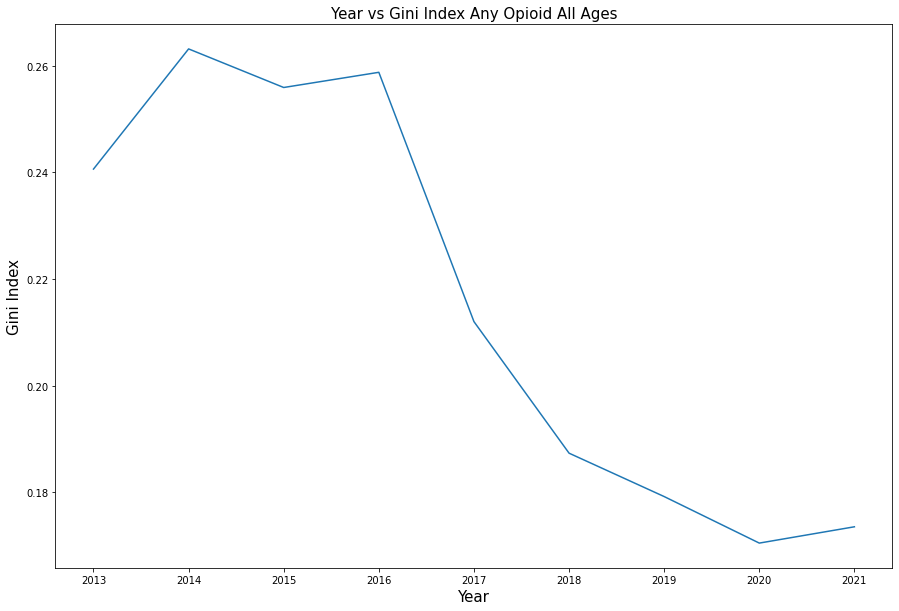

In [35]:
x = [2013,2014,2015,2016,2017,2018,2019,2020,2021]
y = giniall
plt.plot(x,y)
plt.xlabel('Year', fontsize = 15)
plt.ylabel("Gini Index", fontsize = 15)
plt.title("Year vs Gini Index Any Opioid All Ages", fontsize = 15)
plt.rcParams["figure.figsize"] = (20,0)

In [36]:
giniall

[0.2406227075869276,
 0.2631666137655265,
 0.2559272963138701,
 0.25877646122974285,
 0.21200135484235838,
 0.18731989032222962,
 0.17918012225389757,
 0.1704499861449914,
 0.17350834483143696]

In [71]:
gini1524 = []
gini1524.append(ginindex2(df20201524))
gini1524.append(ginindex2(df20191524))

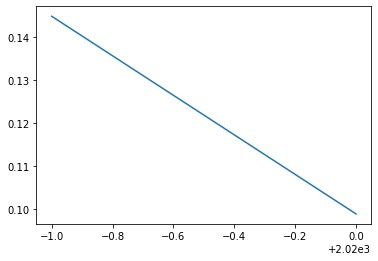

In [72]:
x2 = [2019,2020]
y2 = gini1524
plt.plot(x2,y2)

In [102]:
import pandas as pd

# Read the text file into a DataFrame
data1524pop = pd.read_csv('AllCounties15-24.txt', delimiter='	')

data1524pop

,County,Age,Population
0,Alameda County,15,"20,375"
1,Alameda County,16,"20,306"
2,Alameda County,17,"20,498"
3,Alameda County,18,"22,454"
4,Alameda County,19,"24,029"
...,...,...,...
575,Yuba County,20,"1,067"
576,Yuba County,21,"1,083"
577,Yuba County,22,"1,060"
578,Yuba County,23,"1,042"


In [103]:
data1524pop['Population'] = data1524pop['Population'].str.replace(',', '')
data1524pop['Population'] = data1524pop["Population"].astype(float)
grouped_Data = data1524pop.groupby("County")
for county, group in grouped_Data:
    print(f"County: {county}")

County: Alameda County
County: Alpine County
County: Amador County
County: Butte County
County: Calaveras County
County: Colusa County
County: Contra Costa County
County: Del Norte County
County: El Dorado County
County: Fresno County
County: Glenn County
County: Humboldt County
County: Imperial County
County: Inyo County
County: Kern County
County: Kings County
County: Lake County
County: Lassen County
County: Los Angeles County
County: Madera County
County: Marin County
County: Mariposa County
County: Mendocino County
County: Merced County
County: Modoc County
County: Mono County
County: Monterey County
County: Napa County
County: Nevada County
County: Orange County
County: Placer County
County: Plumas County
County: Riverside County
County: Sacramento County
County: San Benito County
County: San Bernardino County
County: San Diego County
County: San Francisco County
County: San Joaquin County
County: San Luis Obispo County
County: San Mateo County
County: Santa Barbara County
County

In [104]:
dfs = []
for name, group in grouped_Data:
    df = pd.DataFrame(group)
    dfs.append(df)

In [105]:
dfs[0]

,County,Age,Population
0,Alameda County,15,20375.0
1,Alameda County,16,20306.0
2,Alameda County,17,20498.0
3,Alameda County,18,22454.0
4,Alameda County,19,24029.0
5,Alameda County,20,24387.0
6,Alameda County,21,23863.0
7,Alameda County,22,23689.0
8,Alameda County,23,24102.0
9,Alameda County,24,24583.0


In [106]:
for df in dfs:
    population_sum = df['Population'].sum()
    new_row = {'County': 'Total', 'Age': 'All', 'Population': population_sum}
    df = df.append(new_row, ignore_index=True)
    # Optionally, you can assign the modified DataFrame back to the list
    # dfs[index] = df


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_52901/4146407135.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_52901/4146407135.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_52901/4146407135.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_52901/4146407135.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

In [107]:
for index, df in enumerate(dfs):
    population_sum = df['Population'].sum()
    countyname = df['County'].iloc[-1]
    new_row = {'County': countyname, 'Age': 'All', 'Population': population_sum}
    dfs[index] = df.append(new_row, ignore_index=True)


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_52901/1118138615.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[index] = df.append(new_row, ignore_index=True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_52901/1118138615.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[index] = df.append(new_row, ignore_index=True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_52901/1118138615.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[index] = df.append(new_row, ignore_index=True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_52901/1118138615.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [108]:
dfpop1524complete = []
for frames in dfs:
    total = frames.iloc[10]
    dfpop1524complete.append(total)

In [109]:
dfpop1524complete = pd.DataFrame(dfpop1524complete)

In [110]:
dfpop1524complete

,County,Age,Population
10,Alameda County,All,228286.0
10,Alpine County,All,146.0
10,Amador County,All,4158.0
10,Butte County,All,44234.0
10,Calaveras County,All,4833.0
10,Colusa County,All,3413.0
10,Contra Costa County,All,136747.0
10,Del Norte County,All,3645.0
10,El Dorado County,All,26343.0
10,Fresno County,All,170157.0


In [111]:
import pandas as pd

# Create the table data
table_data = [
    ["Alameda County, CA", "06001", 14],
    ["Contra Costa County, CA", "06013", 21],
    ["Fresno County, CA", "06019", 21],
    ["Kern County, CA", "06029", 29],
    ["Los Angeles County, CA", "06037", 217],
    ["Orange County, CA", "06059", 103],
    ["Riverside County, CA", "06065", 70],
    ["Sacramento County, CA", "06067", 23],
    ["San Bernardino County, CA", "06071", 73],
    ["San Diego County, CA", "06073", 80],
    ["San Francisco County, CA", "06075", 16],
    ["San Joaquin County, CA", "06077", 15],
    ["San Luis Obispo County, CA", "06079", 11],
    ["San Mateo County, CA", "06081", 12],
    ["Santa Clara County, CA", "06085", 31],
    ["Sonoma County, CA", "06097", 10],
    ["Stanislaus County, CA", "06099", 11],
    ["Ventura County, CA", "06111", 25]
]

# Create the DataFrame
df20211524 = pd.DataFrame(table_data, columns=["County", "County Code", "Deaths"])

# Print the DataFrame
print(df20211524)


                        County County Code  Deaths
0           Alameda County, CA       06001      14
1      Contra Costa County, CA       06013      21
2            Fresno County, CA       06019      21
3              Kern County, CA       06029      29
4       Los Angeles County, CA       06037     217
5            Orange County, CA       06059     103
6         Riverside County, CA       06065      70
7        Sacramento County, CA       06067      23
8    San Bernardino County, CA       06071      73
9         San Diego County, CA       06073      80
10    San Francisco County, CA       06075      16
11      San Joaquin County, CA       06077      15
12  San Luis Obispo County, CA       06079      11
13        San Mateo County, CA       06081      12
14      Santa Clara County, CA       06085      31
15           Sonoma County, CA       06097      10
16       Stanislaus County, CA       06099      11
17          Ventura County, CA       06111      25


In [61]:
ginindex(df20211524,dfpop1524complete)

0.13933036985526548

In [62]:
dfpop1524complete

,County,Age,Population
10,"Alameda County, CA",All,228286.0
10,"Alpine County, CA",All,146.0
10,"Amador County, CA",All,4158.0
10,"Butte County, CA",All,44234.0
10,"Calaveras County, CA",All,4833.0
10,"Colusa County, CA",All,3413.0
10,"Contra Costa County, CA",All,136747.0
10,"Del Norte County, CA",All,3645.0
10,"El Dorado County, CA",All,26343.0
10,"Fresno County, CA",All,170157.0


In [63]:
df20211524

,County,County Code,Deaths
0,"Alameda County, CA",06001,14
1,"Contra Costa County, CA",06013,21
2,"Fresno County, CA",06019,21
3,"Kern County, CA",06029,29
4,"Los Angeles County, CA",06037,217
5,"Orange County, CA",06059,103
6,"Riverside County, CA",06065,70
7,"Sacramento County, CA",06067,23
8,"San Bernardino County, CA",06071,73
9,"San Diego County, CA",06073,80


In [65]:
gini1524 = []
gini1524.append(ginindex2(df20201524))
gini1524.append(ginindex2(df20191524))
gini1524.append(0.13933)

In [68]:
gini1524b = [0.145, 0.0988, 0.13933]

In [70]:


float_list = [float(value) for value in gini1524b]

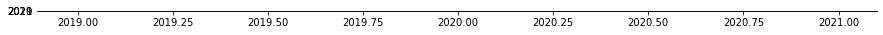

In [73]:
x2 = [2019,2020,2021]
float_listx = [float(value) for value in x2]
plt.plot(x2,float_listx)
plt.rcParams["figure.figsize"] = (30,30)

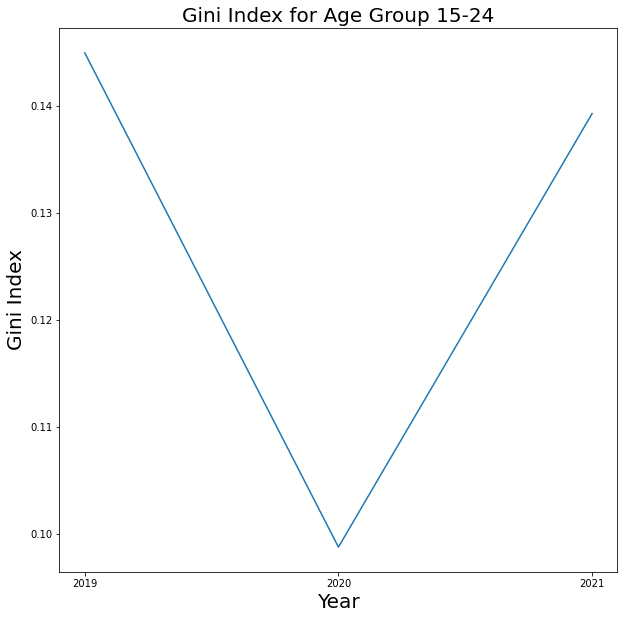

In [83]:
import matplotlib.pyplot as plt

gini1524b = [0.145, 0.0988, 0.13933]
x2 = ['2019', '2020', '2021']

plt.plot(x2, gini1524b)
plt.rcParams["figure.figsize"] = (25,25)  # Adjust the figure size if needed
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Gini Index', fontsize = 20)
plt.title('Gini Index for Age Group 15-24, All Drugs', fontsize = 20)
plt.show()


Text(0.5, 1.0, 'Lorenz Curve for Ages 15-24, 2020 All Opioids and Meth')

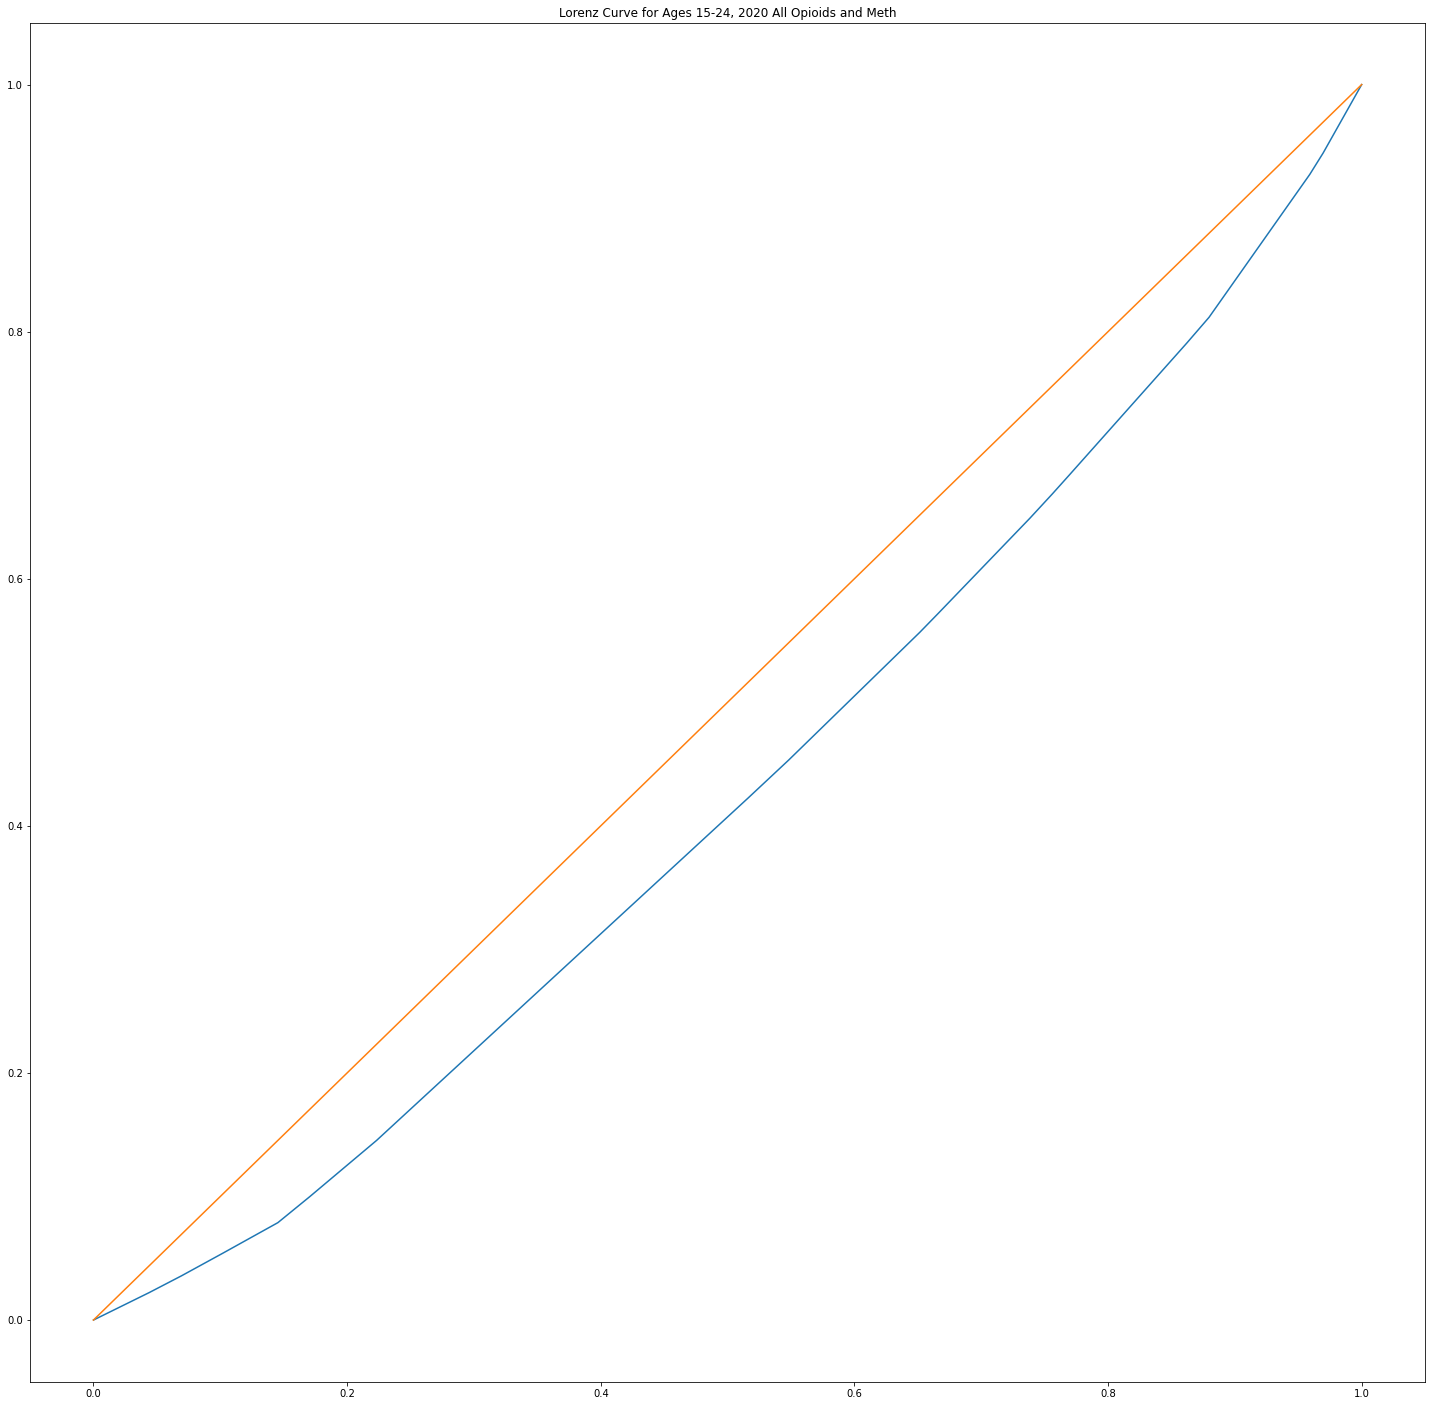

In [119]:
ginindex2graph(df20201524)
plt.title("Lorenz Curve for Ages 15-24, 2020 All Opioids and Meth")



Text(0.5, 1.0, 'Lorenz Curve for Ages, 15-24, 2019 All Opioids and Meth')

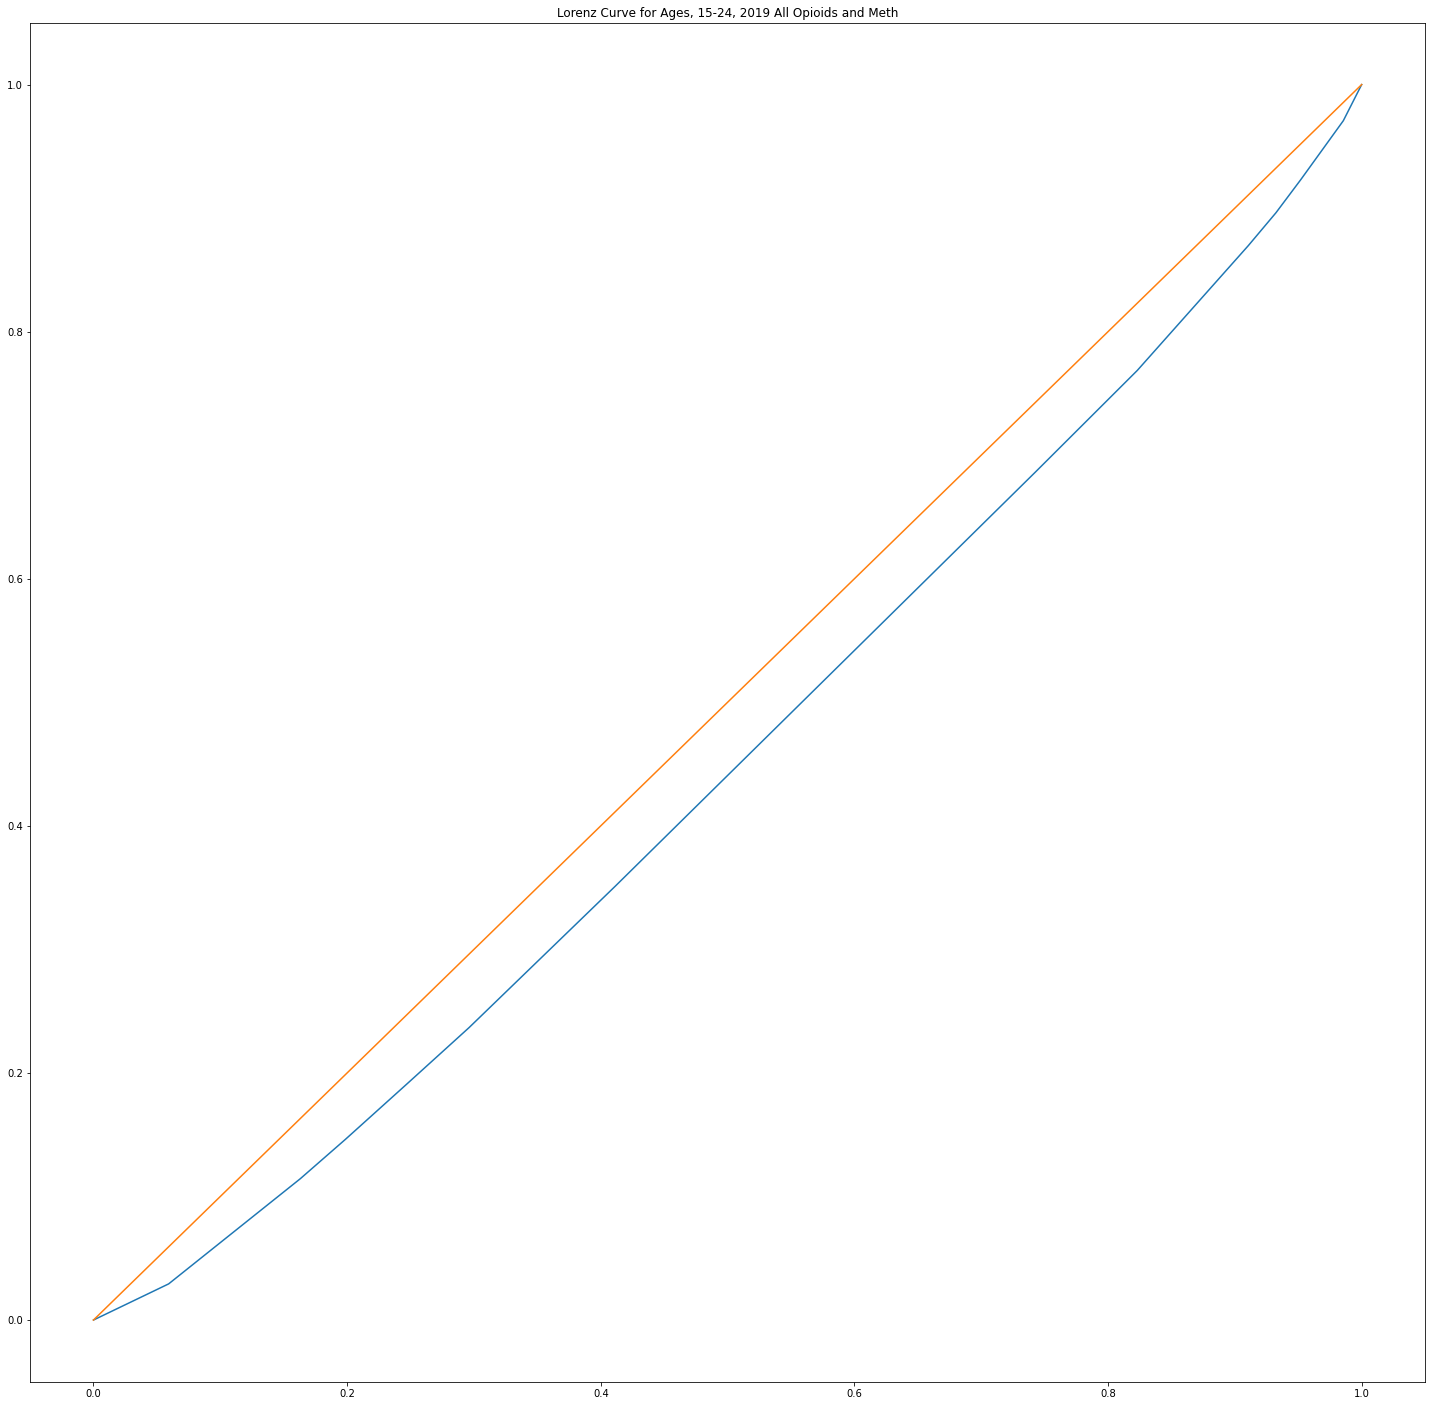

In [120]:
ginindex2graph(df20191524)
plt.title("Lorenz Curve for Ages, 15-24, 2019 All Opioids and Meth")



Text(0.5, 1.0, 'Lorenz Curve for All Ages, 2013 All Opioids and Meth')

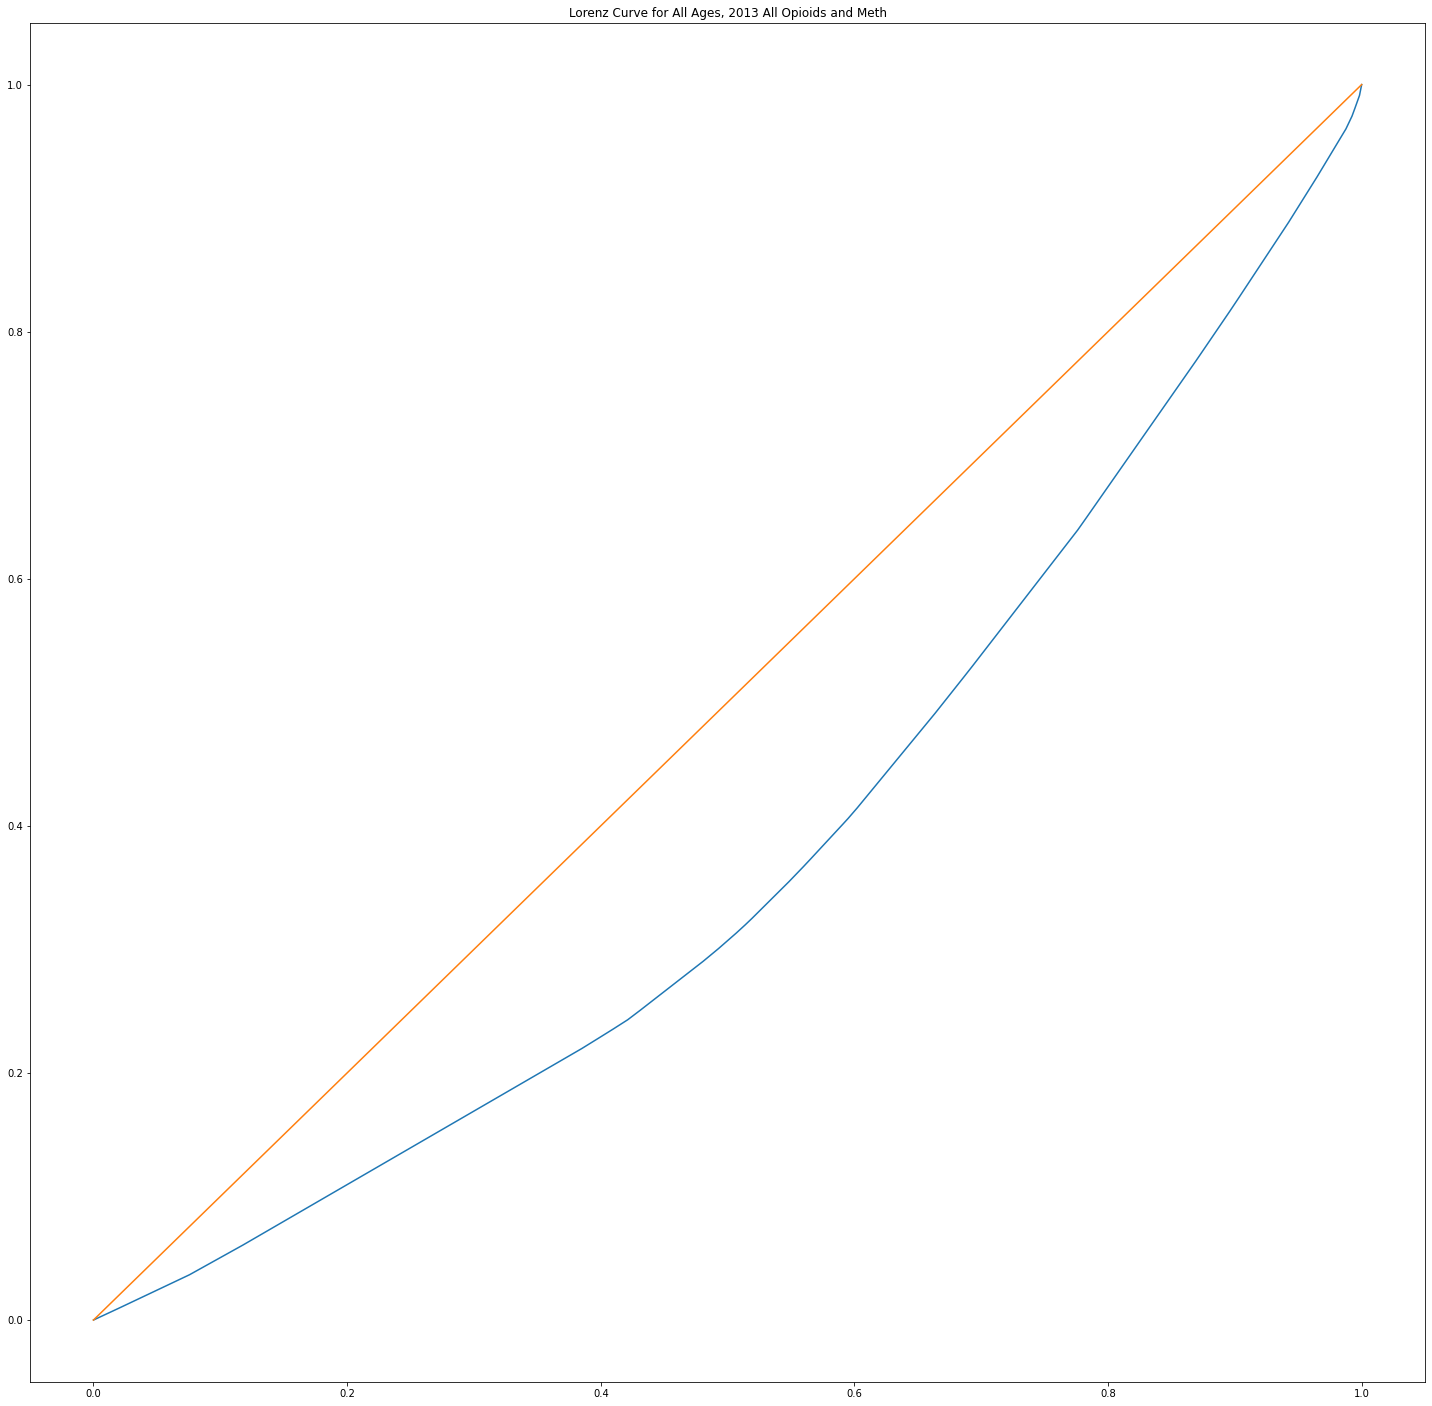

In [121]:
ginindex2graph(dfall2013)
plt.title("Lorenz Curve for All Ages, 2013 All Opioids and Meth")



Text(0.5, 1.0, 'Lorenz Curve for All Ages 2018  All Opioids and Meth')

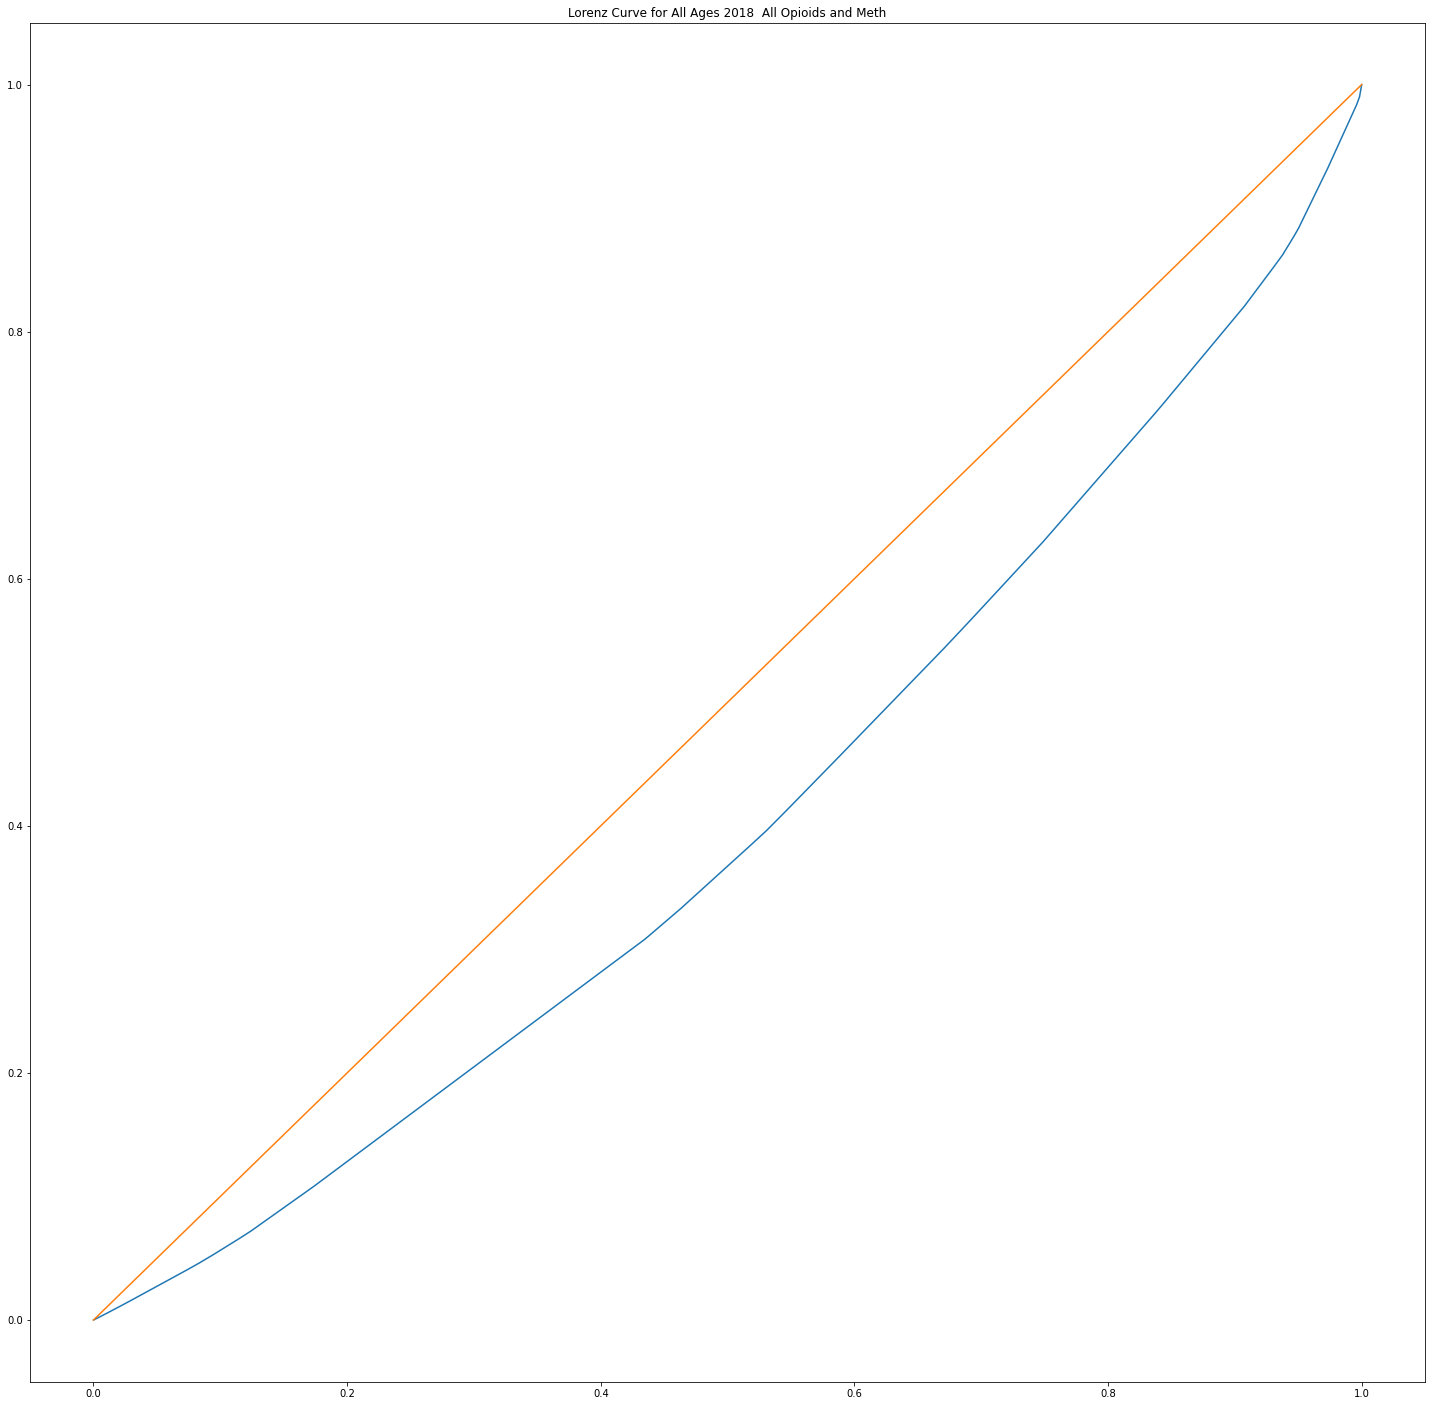

In [122]:
ginindex2graph(df2018all)
plt.title("Lorenz Curve for All Ages 2018  All Opioids and Meth")



In [115]:
ginindexgraph(dfall2021,df)
plt.title("Lorenz Curve for All Ages, All Opioids and Meth")



IndexError: single positional indexer is out-of-bounds

In [114]:
ginindexgraph(df20211524,dfpop1524complete)
plt.title("Lorenz Curve for All Ages, 15-24, All Opioids and Meth")


IndexError: single positional indexer is out-of-bounds

In [37]:
import pandas as pd

data = {
    "County": [
        "Kern County, CA",
        "Los Angeles County, CA",
        "Orange County, CA",
        "Riverside County, CA",
        "San Diego County, CA",
        "San Francisco County, CA",
        "Santa Clara County, CA"
    ],
    "County Code": [
        "06029",
        "06037",
        "06059",
        "06065",
        "06073",
        "06075",
        "06085"
    ],
    "Deaths": [11, 20, 34, 11, 47, 16, 10],
    "Population": [882176, 10170292, 3169776, 2361026, 3299521, 864816, 1918044],
    "Crude Rate": ["Unreliable", 0.2, 1.1, "Unreliable", 1.4, "Unreliable", "Unreliable"]
}

df2015fentanyl = pd.DataFrame(data)
print(df2015fentanyl)


                     County County Code  Deaths  Population  Crude Rate
0           Kern County, CA       06029      11      882176  Unreliable
1    Los Angeles County, CA       06037      20    10170292         0.2
2         Orange County, CA       06059      34     3169776         1.1
3      Riverside County, CA       06065      11     2361026  Unreliable
4      San Diego County, CA       06073      47     3299521         1.4
5  San Francisco County, CA       06075      16      864816  Unreliable
6    Santa Clara County, CA       06085      10     1918044  Unreliable


In [38]:
ginindex2(df2015fentanyl)

0.4261147614863856

In [39]:
import pandas as pd

table_data = [
    ["Alameda County, CA", "06001", 11, 1647704, "Unreliable"],
    ["Los Angeles County, CA", "06037", 75, 10137915, 0.7],
    ["Orange County, CA", "06059", 48, 3172532, 1.5],
    ["Riverside County, CA", "06065", 11, 2387741, "Unreliable"],
    ["Sacramento County, CA", "06067", 16, 1514460, "Unreliable"],
    ["San Diego County, CA", "06073", 51, 3317749, 1.5],
    ["San Francisco County, CA", "06075", 21, 870887, 2.4],
    ["Santa Clara County, CA", "06085", 13, 1919402, "Unreliable"]
]

# Define column names
columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

# Create DataFrame
df2016fentanyl = pd.DataFrame(table_data, columns=columns)

print(df2016fentanyl)


                     County County Code  Deaths  Population  Crude Rate
0        Alameda County, CA       06001      11     1647704  Unreliable
1    Los Angeles County, CA       06037      75    10137915         0.7
2         Orange County, CA       06059      48     3172532         1.5
3      Riverside County, CA       06065      11     2387741  Unreliable
4     Sacramento County, CA       06067      16     1514460  Unreliable
5      San Diego County, CA       06073      51     3317749         1.5
6  San Francisco County, CA       06075      21      870887         2.4
7    Santa Clara County, CA       06085      13     1919402  Unreliable


In [40]:
ginindex2(df2016fentanyl)

0.23428634222020883

In [41]:
import pandas as pd

table_data = [
    ["Alameda County, CA", "06001", 14, 1666753, "Unreliable"],
    ["Contra Costa County, CA", "06013", 29, 1150215, 2.5],
    ["Kern County, CA", "06029", 35, 896764, 3.9],
    ["Los Angeles County, CA", "06037", 221, 10105518, 2.2],
    ["Orange County, CA", "06059", 115, 3185968, 3.6],
    ["Riverside County, CA", "06065", 60, 2450758, 2.4],
    ["Sacramento County, CA", "06067", 20, 1540975, 1.3],
    ["San Bernardino County, CA", "06071", 31, 2171603, 1.4],
    ["San Diego County, CA", "06073", 100, 3343364, 3.0],
    ["San Francisco County, CA", "06075", 68, 883305, 7.7],
    ["San Mateo County, CA", "06081", 14, 769545, "Unreliable"],
    ["Santa Clara County, CA", "06085", 16, 1937570, "Unreliable"],
    ["Sonoma County, CA", "06097", 23, 499942, 4.6],
    ["Ventura County, CA", "06111", 35, 850967, 4.1]
]

# Define column names
columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

# Create DataFrame
df2018fentanyl = pd.DataFrame(table_data, columns=columns)
ginindex2(df2018fentanyl)

0.2536467824402241

In [43]:
import pandas as pd

table_data = [
    ["Contra Costa County, CA", "06013", 17, 1147439, "Unreliable"],
    ["Kern County, CA", "06029", 12, 893119, "Unreliable"],
    ["Los Angeles County, CA", "06037", 132, 10163507, 1.3],
    ["Orange County, CA", "06059", 64, 3190400, 2.0],
    ["Riverside County, CA", "06065", 32, 2423266, 1.3],
    ["Sacramento County, CA", "06067", 10, 1530615, "Unreliable"],
    ["San Bernardino County, CA", "06071", 14, 2157404, "Unreliable"],
    ["San Diego County, CA", "06073", 93, 3337685, 2.8],
    ["San Francisco County, CA", "06075", 20, 884363, 2.3],
    ["Santa Barbara County, CA", "06083", 10, 448150, "Unreliable"],
    ["Santa Clara County, CA", "06085", 17, 1938153, "Unreliable"],
    ["Ventura County, CA", "06111", 26, 854223, 3.0]
]

# Define column names
columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

# Create DataFrame
df2017fentanyl = pd.DataFrame(table_data, columns=columns)

print(df2017fentanyl)
ginindex2(df2017fentanyl)

                       County County Code  Deaths  Population  Crude Rate
0     Contra Costa County, CA       06013      17     1147439  Unreliable
1             Kern County, CA       06029      12      893119  Unreliable
2      Los Angeles County, CA       06037     132    10163507         1.3
3           Orange County, CA       06059      64     3190400         2.0
4        Riverside County, CA       06065      32     2423266         1.3
5       Sacramento County, CA       06067      10     1530615  Unreliable
6   San Bernardino County, CA       06071      14     2157404  Unreliable
7        San Diego County, CA       06073      93     3337685         2.8
8    San Francisco County, CA       06075      20      884363         2.3
9    Santa Barbara County, CA       06083      10      448150  Unreliable
10     Santa Clara County, CA       06085      17     1938153  Unreliable
11         Ventura County, CA       06111      26      854223         3.0


0.22985836697937967

In [44]:
import pandas as pd

table_data = [
    ["Alameda County, CA", "06001", 57, 1671329, 3.4],
    ["Contra Costa County, CA", "06013", 51, 1153526, 4.4],
    ["Fresno County, CA", "06019", 18, 999101, "Unreliable"],
    ["Kern County, CA", "06029", 54, 900202, 6.0],
    ["Los Angeles County, CA", "06037", 420, 10039107, 4.2],
    ["Marin County, CA", "06041", 11, 258826, "Unreliable"],
    ["Orange County, CA", "06059", 138, 3175692, 4.3],
    ["Riverside County, CA", "06065", 135, 2470546, 5.5],
    ["Sacramento County, CA", "06067", 42, 1552058, 2.7],
    ["San Bernardino County, CA", "06071", 69, 2180085, 3.2],
    ["San Diego County, CA", "06073", 152, 3338330, 4.6],
    ["San Francisco County, CA", "06075", 197, 881549, 22.3],
    ["San Joaquin County, CA", "06077", 14, 762148, "Unreliable"],
    ["San Mateo County, CA", "06081", 39, 766573, 5.1],
    ["Santa Barbara County, CA", "06083", 16, 446499, "Unreliable"],
    ["Santa Clara County, CA", "06085", 30, 1927852, 1.6],
    ["Solano County, CA", "06095", 19, 447643, "Unreliable"],
    ["Sonoma County, CA", "06097", 44, 494336, 8.9],
    ["Stanislaus County, CA", "06099", 15, 550660, "Unreliable"],
    ["Ventura County, CA", "06111", 41, 846006, 4.8]
]

# Define column names
columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

# Create DataFrame
df2019fentanyl = pd.DataFrame(table_data, columns=columns)
ginindex2(df2019fentanyl)

0.23179706439465275

In [45]:
import pandas as pd

table_data = [
    ["Alameda County, CA", "06001", 121, 1662323, 7.3],
    ["Contra Costa County, CA", "06013", 111, 1152333, 9.6],
    ["El Dorado County, CA", "06017", 14, 192925, "Unreliable"],
    ["Fresno County, CA", "06019", 46, 1000918, 4.6],
    ["Humboldt County, CA", "06023", 11, 134977, "Unreliable"],
    ["Imperial County, CA", "06025", 18, 180267, "Unreliable"],
    ["Kern County, CA", "06029", 141, 901362, 15.6],
    ["Los Angeles County, CA", "06037", 1002, 9943046, 10.1],
    ["Marin County, CA", "06041", 23, 257332, 8.9],
    ["Mendocino County, CA", "06045", 14, 86061, "Unreliable"],
    ["Merced County, CA", "06047", 19, 279252, "Unreliable"],
    ["Monterey County, CA", "06053", 23, 430906, 5.3],
    ["Nevada County, CA", "06057", 20, 99606, 20.1],
    ["Orange County, CA", "06059", 396, 3166857, 12.5],
    ["Placer County, CA", "06061", 27, 402950, 6.7],
    ["Riverside County, CA", "06065", 284, 2489188, 11.4],
    ["Sacramento County, CA", "06067", 55, 1559146, 3.5],
    ["San Bernardino County, CA", "06071", 237, 2189183, 10.8],
    ["San Diego County, CA", "06073", 416, 3332427, 12.5],
    ["San Francisco County, CA", "06075", 381, 866606, 44.0],
    ["San Joaquin County, CA", "06077", 51, 767967, 6.6],
    ["San Luis Obispo County, CA", "06079", 34, 282249, 12.0],
    ["San Mateo County, CA", "06081", 61, 758308, 8.0],
    ["Santa Barbara County, CA", "06083", 10, 444766, "Unreliable"],
    ["Santa Clara County, CA", "06085", 94, 1907105, 4.9],
    ["Santa Cruz County, CA", "06087", 13, 269925, "Unreliable"],
    ["Shasta County, CA", "06089", 11, 179027, "Unreliable"],
    ["Solano County, CA", "06095", 28, 446935, 6.3],
    ["Sonoma County, CA", "06097", 103, 489819, 21.0],
    ["Stanislaus County, CA", "06099", 57, 550081, 10.4],
    ["Tulare County, CA", "06107", 29, 468680, 6.2],
    ["Ventura County, CA", "06111", 89, 841387, 10.6]
]

# Define column names
columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

# Create DataFrame
df2020fentanyl = pd.DataFrame(table_data, columns=columns)

ginindex2(df2020fentanyl)

0.2302406188123225

In [46]:
import pandas as pd

table_data = [
    ["Alameda County, CA", "06001", 165, 1648556, 10.0],
    ["Butte County, CA", "06007", 44, 208309, 21.1],
    ["Contra Costa County, CA", "06013", 162, 1161413, 13.9],
    ["El Dorado County, CA", "06017", 29, 193221, 15.0],
    ["Fresno County, CA", "06019", 69, 1013581, 6.8],
    ["Humboldt County, CA", "06023", 39, 136310, 28.6],
    ["Imperial County, CA", "06025", 15, 179851, "Unreliable"],
    ["Kern County, CA", "06029", 225, 917673, 24.5],
    ["Kings County, CA", "06031", 12, 153443, "Unreliable"],
    ["Lake County, CA", "06033", 26, 68766, 37.8],
    ["Los Angeles County, CA", "06037", 1428, 9829544, 14.5],
    ["Madera County, CA", "06039", 14, 159410, "Unreliable"],
    ["Marin County, CA", "06041", 37, 260206, 14.2],
    ["Mendocino County, CA", "06045", 41, 91305, 44.9],
    ["Merced County, CA", "06047", 18, 286461, "Unreliable"],
    ["Monterey County, CA", "06053", 19, 437325, "Unreliable"],
    ["Napa County, CA", "06055", 13, 136207, "Unreliable"],
    ["Nevada County, CA", "06057", 17, 103487, "Unreliable"],
    ["Orange County, CA", "06059", 659, 3167809, 20.8],
    ["Placer County, CA", "06061", 38, 412300, 9.2],
    ["Riverside County, CA", "06065", 416, 2458395, 16.9],
    ["Sacramento County, CA", "06067", 161, 1588921, 10.1],
    ["San Bernardino County, CA", "06071", 316, 2194710, 14.4],
    ["San Diego County, CA", "06073", 666, 3286069, 20.3],
    ["San Francisco County, CA", "06075", 395, 815201, 48.5],
    ["San Joaquin County, CA", "06077", 105, 789410, 13.3],
    ["San Luis Obispo County, CA", "06079", 59, 283159, 20.8],
    ["San Mateo County, CA", "06081", 74, 737888, 10.0],
    ["Santa Barbara County, CA", "06083", 33, 446475, 7.4],
    ["Santa Clara County, CA", "06085", 131, 1885508, 6.9],
    ["Santa Cruz County, CA", "06087", 25, 267792, 9.3],
    ["Shasta County, CA", "06089", 44, 182139, 24.2],
    ["Solano County, CA", "06095", 40, 451716, 8.9],
    ["Sonoma County, CA", "06097", 111, 485887, 22.8],
    ["Stanislaus County, CA", "06099", 82, 552999, 14.8],
    ["Sutter County, CA", "06101", 21, 99063, 21.2],
    ["Tulare County, CA", "06107", 50, 477054, 10.5],
    ["Ventura County, CA", "06111", 179, 839784, 21.3],
    ["Yuba County, CA", "06115", 13, 83421, "Unreliable"]
]

# Define column names
columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]

# Create DataFrame
df2021fentanyl = pd.DataFrame(table_data, columns=columns)

ginindex2(df2021fentanyl)


0.21605280119906656